# Data Mining Assignment
## By: Nikolaos Gournakis
### Student ID: it22023

# Introduction
This report is an analysis of the process of cleaning and filling-in the dataset given for the assignment and the training of the models for classification of movies into `Won Oscar`/`Not Won Oscar` and clustering.
<Br>

Even thought the report is presented as a Jupyter Notebook. I did the actual process as a python project with multiple modules and a file structure. I did this because I prefer the software development workflow and I find it easier to work with. Even though I do explain everything in the report, I suggest you also take a look at the code in the project (comments are included).


# A) Data Preprocessing
The first part of the assignment is split into three parts:
1. Data Cleaning: handling missing values, renaming columns, etc.
2. Data Scrapping for filling in missing values of the dataset
3. Filling in the data from the second part and also transform data to a more desirable/usable format
<p> To start with part 1 (Data Cleaning), I took a look for general properties of the data </p>

##### Note: The code for this part of the assignment is in the file `preprocessing.py`,`cleaning.py`

In [36]:
import warnings

import numpy as np

warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd

pd.set_option('display.max_columns', None)
df = pd.read_excel("data/movies.xlsx")
df.head()

,Film,Year,Script Type,Rotten Tomatoes critics,Metacritic critics,Average critics,Rotten Tomatoes Audience,Metacritic Audience,Rotten Tomatoes vs Metacritic deviance,Average audience,Audience vs Critics deviance,Primary Genre,Genre,Opening Weekend,Opening weekend ($million),Domestic Gross,Domestic gross ($million),Foreign Gross ($million),Foreign Gross,Worldwide Gross,Worldwide Gross ($million),of Gross earned abroad,Budget ($million),Budget recovered,Budget recovered opening weekend,Distributor,IMDb Rating,IMDB vs RT disparity,Release Date (US),Oscar Winners,Oscar Detail
0,300,2007,adaptation,60,51,56,89.0,71,18,80,-25,action,"period, action",70885301,70.89,210614939,210.61,245.45,245453242,456068181,456.0,53.82%,65,701.64%,109.05%,NaN,NaN,NaN,"Mar 9, 2007",NaN,NaN
1,3:10 to Yuma,2007,remake,88,76,82,86.0,73,13,80,3,western,western,14035033,14.04,53606916,53.61,16.17,16173815,69780731,70.0,23.18%,50,139.56%,28.07%,NaN,NaN,NaN,"Sep 7, 2007",NaN,NaN
2,30 Days of Night,2007,adaptation,50,53,52,56.0,65,-9,61,-9,horror,horror,15951902,15.95,39568996,39.57,35.53,35526091,75095087,75.0,47.31%,32,234.67%,49.85%,NaN,NaN,NaN,"Oct 19, 2007",NaN,NaN
3,Across the Universe,2007,original screenplay,54,56,55,82.0,73,9,78,-23,musical,musical,3824988,3.82,24343673,24.34,5.02,5023470,29367143,29.0,17.11%,45,65.26%,8.50%,NaN,NaN,NaN,"Oct 12, 2007",NaN,NaN
4,Alien vs. Predator - Requiem,2007,sequel,14,29,22,31.0,45,-14,38,-17,sci-fi,"sci-fi, horror",10059425,10.06,41797066,41.80,87.09,87086650,128883716,129.0,67.57%,40,322.21%,25.15%,NaN,NaN,NaN,"Dec 25, 2007",NaN,NaN


In [37]:
df.columns

Index(['Film', 'Year', 'Script Type', 'Rotten Tomatoes  critics',
       'Metacritic  critics', 'Average critics ', 'Rotten Tomatoes Audience ',
       'Metacritic Audience ', 'Rotten Tomatoes vs Metacritic  deviance',
       'Average audience ', 'Audience vs Critics deviance ', 'Primary Genre',
       'Genre', 'Opening Weekend', 'Opening weekend ($million)',
       'Domestic Gross', 'Domestic gross ($million)',
       'Foreign Gross ($million)', 'Foreign Gross', 'Worldwide Gross',
       'Worldwide Gross ($million)', ' of Gross earned abroad',
       'Budget ($million)', ' Budget recovered',
       ' Budget recovered opening weekend', 'Distributor', 'IMDb Rating',
       'IMDB vs RT disparity', 'Release Date (US)', 'Oscar Winners',
       'Oscar Detail'],
      dtype='object')

### General Observations About Columns
<ol>
<li>
Some are duplicates of others but in different format, example: <code>Domestic Gross</code> , <code>Domestic gross ($million)</code> is the same thing but with a different unit of measurement.
</li>
<li>
Some columns are calculable (<code>Average audience</code>,<code>Budget recovered</code>,etc.), so in order to avoid mistakes in the dataset, we drop these columns and we recalculate them.
</li>
</ol>

### Columns dropped because of the reasons above
<table>
<tr>
    <th>Column Dropped</th>
    <th>Reason</th>
</tr>
<tr>
    <td>DOMESTIC GROSS (\$MILLION)</td>
    <td>Duplicate</td>
</tr>
<tr><td>FOREIGN GROSS (\$MILLION)</td><td>Duplicate</td></tr>
<tr><td>OPENING WEEKEND (\$MILLION)</td><td>Duplicate</td></tr>
<tr><td>WORLDWIDE GROSS (\$MILLION)</td><td>Duplicate</td></tr>
<tr><td>OF GROSS EARNED ABROAD</td><td>Calculable</td></tr>
<tr><td>ROTTEN TOMATOES VS METACRITIC  DEVIANCE</td><td>Calculable</td></tr>
<tr><td>AVERAGE AUDIENCE</td><td>Calculable</td></tr>
<tr><td>AVERAGE CRITICS</td><td>Calculable</td></tr>
<tr><td>ROTTEN TOMATOES VS METACRITIC  DEVIANCE</td><td>Calculable</td></tr>
<tr><td>BUDGET RECOVERED OPENING WEEKEND</td><td>Calculable</td></tr>
<tr><td>BUDGET RECOVERED</td><td>Calculable</td></tr>
<tr><td>AUDIENCE VS CRITICS DEVIANCE</td><td>Calculable</td></tr>

</table>

In [38]:
df.drop(columns=['Average critics ', 'Rotten Tomatoes vs Metacritic  deviance',
                 'Average audience ', 'Audience vs Critics deviance ', 'Opening weekend ($million)',
                 'Domestic gross ($million)',
                 'Foreign Gross ($million)', 'Worldwide Gross ($million)', ' of Gross earned abroad',
                 ' Budget recovered', ' Budget recovered opening weekend'], inplace=True)

### Observations About Column Names
- Naming is not very consistent across columns (trailing/leading spaces, two adjacent spaces).
- Column names might not be very descriptive, or not descriptive enough
- Undesirable character for code, it might be tedious to write `Worldwide Gross ($million)` in code multiple times

## Renaming of Columns

<p>Renaming each column follows a ruleset that I came up with for consistency, readability and descriptiveness:</p>

- All letters are upper case
- All spaces are replaced by an underscore
- If the column name contains part of a brand name, it becomes abbreviated (e.g., Metacritic => MC, Rotten Tomatoes => RT)
- Percentage Symbols added were appropriate
- (Rarely Used) If a column name is undesirable/non-descriptive, then a more appropriate name is chosen

###### Note: Some columns are missing from the table, they will be addressed later
<table>
<tr>
<th>Column Before</th>
<th>Column After</th>
</tr>
<tr><td>FILM</td><td>TITLE</td></tr>
<tr><td>YEAR</td><td>RELEASE_YEAR</td></tr>
<tr><td>SCRIPT TYPE</td><td>SCRIPT_TYPE</td></tr>
<tr><td>ROTTEN TOMATOES  CRITICS</td><td>RT_CRITICS</td></tr>
<tr><td>METACRITIC  CRITICS</td><td>MC_CRITICS</td></tr>
<tr><td>AVERAGE CRITICS</td><td>AVERAGE_CRITICS</td></tr>
<tr><td>ROTTEN TOMATOES AUDIENCE</td><td>RT_AUDIENCE</td></tr>
<tr><td>METACRITIC AUDIENCE</td><td>MC_AUDIENCE</td></tr>
<tr><td>ROTTEN TOMATOES VS METACRITIC  DEVIANCE</td><td>RT_MC_AUDIENCE_DIFFERENCE</td></tr>
<tr><td>AVERAGE AUDIENCE</td><td>AVERAGE_AUDIENCE</td></tr>
<tr><td>AUDIENCE VS CRITICS DEVIANCE</td><td>CRITICS_AUDIENCE_DIFFERENCE</td></tr>
<tr><td>PRIMARY GENRE</td><td>PRIMARY_GENRE</td></tr>
<tr><td>GENRE</td><td>GENRE</td></tr>
<tr><td>OPENING WEEKEND</td><td>OPENING_WEEKEND</td></tr>
<tr><td>DOMESTIC GROSS</td><td>DOMESTIC_GROSS</td></tr>
<tr><td>FOREIGN GROSS</td><td>FOREIGN_GROSS</td></tr>
<tr><td>WORLDWIDE GROSS</td><td>WORLDWIDE_GROSS</td></tr>
<tr><td>OF GROSS EARNED ABROAD</td><td>%OF_GROSS_EARNED_ABROAD</td></tr>
<tr><td>BUDGET (\$MILLION)</td><td>BUDGET</td></tr>
<tr><td>BUDGET RECOVERED</td><td>%BUDGET_RECOVERED</td></tr>
<tr><td>BUDGET RECOVERED OPENING WEEKEND</td><td>%BUDGET_RECOVERED_OPENING_WEEKEND</td></tr>
<tr><td>IMDB RATING</td><td>IMDB_RATING</td></tr>
<tr><td>IMDB VS RT DISPARITY</td><td>IMDB_RT_DIFFERENCE</td></tr>
<tr><td>OSCAR WINNERS</td><td>WON_OSCAR</td></tr>
<tr><td>OSCAR DETAIL</td><td>OSCAR_DETAILS</td></tr>
</table>

In [39]:
df.columns = [x.upper().strip() for x in df.columns]
try:
    df.rename(columns=
              {'FILM': 'TITLE',
               'YEAR': 'RELEASE_YEAR',
               'SCRIPT TYPE': 'SCRIPT_TYPE',
               'ROTTEN TOMATOES  CRITICS': 'RT_CRITICS',
               'METACRITIC  CRITICS': 'MC_CRITICS',
               'ROTTEN TOMATOES AUDIENCE': 'RT_AUDIENCE',
               'METACRITIC AUDIENCE': 'MC_AUDIENCE',
               'PRIMARY GENRE': 'PRIMARY_GENRE',
               'OPENING WEEKEND': 'OPENING_WEEKEND',
               'DOMESTIC GROSS': 'DOMESTIC_GROSS',
               'FOREIGN GROSS': 'FOREIGN_GROSS',
               'WORLDWIDE GROSS': 'WORLDWIDE_GROSS',
               'BUDGET ($MILLION)': 'BUDGET',
               'IMDB RATING': 'IMDB_RATING',
               'IMDB VS RT DISPARITY': 'IMDB_RT_DIFFERENCE',
               'OSCAR WINNERS': 'WON_OSCAR',
               'OSCAR DETAIL': 'OSCAR_DETAILS'},
              inplace=True)
except Exception as e:
    print(e)

In [40]:
na_columns = df.isna().sum()
na_columns[na_columns > 0]

RT_CRITICS               1
RT_AUDIENCE              1
PRIMARY_GENRE         1383
GENRE                    1
DISTRIBUTOR           1402
IMDB_RATING           1402
IMDB_RT_DIFFERENCE    1402
WON_OSCAR             1346
OSCAR_DETAILS         1346
dtype: int64

### Observations About Missing Values
We know that the length of the dataset is 1402 rows, and we can see that the columns `Distributor`,`IMDb Rating` ,`IMDB vs RT disparity`,`Oscar Winners`,`Oscar Detail`,`Primary Genre` have way too many missing values.
<Br>
#### Distributor
Distributor is a column that is not very easily filled, so we drop it.
<hr>

#### IMDb Rating
IMDb Rating is a column that we can fill with outside data, we will see later how we fill this column.
<hr>

#### IMDb vs RT Disparity
The same goes for this column, it will be calculated at the same time.
<hr>

#### Oscar Winners
The missing values can be interpreted as "No Oscar Won" or an actual missing value. We assume that NaN means "No Oscar Won" and we fill the missing values with `False`.
<hr>

#### Oscar Detail
The missing values can be interpreted as "No Oscar Won" or an actual missing value. We assume that NaN means "No Oscar Won".
<hr>

#### Primary Genre
The number of values in the column `Primary Genre` is very low, and I don't find it as a crucial column, as there is a column `Genre` that I go way more in depth into, so we drop `Primary Genre`.
 

In [41]:
df.drop(columns=["DISTRIBUTOR", "PRIMARY_GENRE"], inplace=True)

In [42]:
df.dtypes

TITLE                  object
RELEASE_YEAR            int64
SCRIPT_TYPE            object
RT_CRITICS             object
MC_CRITICS             object
RT_AUDIENCE           float64
MC_AUDIENCE            object
GENRE                  object
OPENING_WEEKEND        object
DOMESTIC_GROSS         object
FOREIGN_GROSS          object
WORLDWIDE_GROSS        object
BUDGET                 object
IMDB_RATING           float64
IMDB_RT_DIFFERENCE    float64
RELEASE DATE (US)      object
WON_OSCAR              object
OSCAR_DETAILS          object
dtype: object

### Observations About Data Types
- `RT_CRITICS`, `MC_CRITICS`, `MC_AUDIENCE` , `OPENING_WEEKEND`, `DOMESTIC_GROSS`, `FOREIGN_GROSS`, `WORLDWIDE_GROSS`, `BUDGET` are all of type `object` when they should be of type `float64` or `int64`.
- `WON_OSCAR` is of type `object` when it should be of type `bool`.

This might indicate that the columns either have strings instead of numbers, or that they were mistyped or that they might have been entered into the dataset in a different format. So we will check each column individually.

In [43]:
# Trying to cast `RT_CRITICS` to `float64` excepting an error to help us find the problem-values
try:
    df["RT_CRITICS"].astype("float64")
except Exception as e:
    print(e)

could not convert string to float: '-'


We can see one of the problem-values of `RT_CRITICS` is `-` which was probably entered either by mistake, or it was a missing value. We will replace with `NaN` and then we will cast the column to `float64`.

In [44]:
def clean_general_float(x):
    if isinstance(x, str):
        if x == '-':
            return pd.NA
    if pd.isna(x):
        return x
    return float(x)

We create this general function to clean floats, and we apply it to `RT_CRITICS`. This will result in the column having some floats and some `NaN` values. So to cast the column to `int64` we will need to handle the `NaN` values. I decided to fill the `NaN` values with the mean of the column.

In [45]:
df['RT_CRITICS'] = df['RT_CRITICS'].apply(lambda x: clean_general_float(x))
df['RT_CRITICS'] = df['RT_CRITICS'].fillna(df['RT_CRITICS'].mean())
df['RT_CRITICS'] = df['RT_CRITICS'].apply(lambda x: int(x))
df['RT_CRITICS'].dtype

dtype('int64')

In [46]:
# Trying to cast `MC_CRITICS` to `float64` excepting an error to help us find the problem-values
try:
    df["MC_CRITICS"].astype("float64")
except Exception as e:
    print(e)

could not convert string to float: '-'


In [47]:
df['MC_CRITICS'].unique()

array([51, 76, 53, 56, 29, 39, 54, 59, 64, 69, 13, 62, 33, 75, 17, 37, 45,
       35, 19, 77, 81, 47, 28, 46, 65, 73, 85, 25, 61, 82, 48, 42, 91, 50,
       27, 96, 44, 36, 49, 58, 74, 83, 67, 32, 80, 92, 41, 63, 78, 94, 84,
       86, 79, 70, 31, 34, 40, 71, 43, 55, 57, 24, 26, 66, 30, 72, 52, 9,
       60, 68, 15, 20, 88, 38, 23, 21, 95, 22, 18, 90, 89, 87, 97, 11,
       100, 12, 16, 93, 99, '-'], dtype=object)

In [48]:
# We can see the same problem-value as before, so we will apply the same strategy
df['MC_CRITICS'] = df['MC_CRITICS'].apply(lambda x: clean_general_float(x))
df['MC_CRITICS'] = df['MC_CRITICS'].fillna(df['MC_CRITICS'].mean())
df['MC_CRITICS'] = df['MC_CRITICS'].apply(lambda x: int(x))
df['MC_CRITICS'].dtype

dtype('int64')

In [49]:
# Trying to cast `MC_AUDIENCE` to `float64` excepting an error to help us find the problem-values 
try:
    df["MC_AUDIENCE"].astype("float64")
except Exception as e:
    print(e)

could not convert string to float: '-'


In [50]:
df['MC_AUDIENCE'].unique()

array([71, 73, 65, 45, 55, 75, 64, 63, 70, 69, 19, 81, 29, 83, 21, 47, 38,
       41, 80, 57, 35, 50, 53, 82, 67, 46, 51, 66, 78, 88, 56, 59, 76, 43,
       68, 48, 61, 86, 60, 87, 74, 62, 72, 79, 92, 85, 89, 77, 90, 52, 44,
       39, 54, 49, 58, 28, 15, 84, 42, 32, 37, 33, 91, 27, 30, 34, 24, 26,
       31, 25, 36, 22, 23, 9, 18, 11, '-', 40], dtype=object)

In [51]:
# We can see the same problem-value as before, so we will apply the same strategy
df['MC_AUDIENCE'] = df['MC_AUDIENCE'].apply(lambda x: clean_general_float(x))
df['MC_AUDIENCE'] = df['MC_AUDIENCE'].fillna(df['MC_AUDIENCE'].mean())
df['MC_AUDIENCE'] = df['MC_AUDIENCE'].apply(lambda x: int(x))
df['MC_AUDIENCE'].dtype

dtype('int64')

In [52]:
df['RT_AUDIENCE'] = df['RT_AUDIENCE'].apply(lambda x: clean_general_float(x))
df['RT_AUDIENCE'] = df['RT_AUDIENCE'].fillna(df['RT_AUDIENCE'].mean())
df['RT_AUDIENCE'] = df['RT_AUDIENCE'].apply(lambda x: int(x))
df['RT_AUDIENCE'].dtype

dtype('int64')

In [53]:
# Trying to cast `OPENING_WEEKEND` to `float64` excepting an error to help us find the problem-values
try:
    df["OPENING_WEEKEND"].astype("float64")
except Exception as e:
    print(e)

could not convert string to float: '39,826,840'


We can see that there is now a new problem value. But this time, it might not be a mistake, it looks like the data was input in a different format than expected. We were expecting a number without thousands' separators, but we got a number with thousands' separators. To transform the data into the format we want, we can replace all the commas with nothing.

In [54]:
# Redefining the function to remove thousands separating commas
def clean_general_float(x):
    if isinstance(x, str):
        if x == '-':
            return pd.NA

        x = x.replace(',', '')
    if pd.isna(x):
        return x
    return float(x)

In [55]:
df['OPENING_WEEKEND'] = df['OPENING_WEEKEND'].apply(lambda x: clean_general_float(x))
df['OPENING_WEEKEND'].dtype

dtype('float64')

In [56]:
# Trying to cast `DOMESTIC_GROSS` to `float64` excepting an error to help us find the problem-values
try:
    df["DOMESTIC_GROSS"].astype("float64")
except Exception as e:
    print(e)

could not convert string to float: '90,411,453'


In [57]:
# We can see the same problem-value as before, so we will apply the same strategy
df['DOMESTIC_GROSS'] = df['DOMESTIC_GROSS'].apply(lambda x: clean_general_float(x))
df['DOMESTIC_GROSS'].dtype

dtype('float64')

In [58]:
# Trying to cast `FOREIGN_GROSS` to `float64` excepting an error to help us find the problem-values
try:
    df["FOREIGN_GROSS"].astype("float64")
except Exception as e:
    print(e)

could not convert string to float: '301,700,000'


In [59]:
# We can see the same problem-value as before, so we will apply the same strategy
df['FOREIGN_GROSS'] = df['FOREIGN_GROSS'].apply(lambda x: clean_general_float(x))
df['FOREIGN_GROSS'].dtype

dtype('float64')

In [60]:
# Trying to cast `WORLDWIDE_GROSS` to `float64` excepting an error to help us find the problem-values
try:
    df["WORLDWIDE_GROSS"].astype("float64")
except Exception as e:
    print(e)


could not convert string to float: '1,063,160,000'


In [61]:
# We can see the same problem-value as before, so we will apply the same strategy
df['WORLDWIDE_GROSS'] = df['WORLDWIDE_GROSS'].apply(lambda x: clean_general_float(x))
df['WORLDWIDE_GROSS'].dtype

dtype('float64')

In [62]:
# Trying to cast `BUDGET` to `float64` excepting an error to help us find the problem-values
try:
    df["BUDGET"].astype("float64")
except Exception as e:
    print(e)

could not convert string to float: '-'


In [63]:
# We can see the same problem-value as before, so we will apply the same strategy   
df['BUDGET'] = df['BUDGET'].apply(lambda x: clean_general_float(x))
df['BUDGET'] = df['BUDGET'].fillna(df['BUDGET'].mean())
df['BUDGET'].dtype

dtype('float64')

In [64]:
# Analyzing the column `WON_OSCAR`
df['WON_OSCAR'].unique()

array([nan, 'Oscar winner', 'Oscar Winner'], dtype=object)

We can detect two problems with the column `WON_OSCAR`:
1. There are some rows with `Oscar winner` and some with `Oscar Winner` , we will make them all the same.
2. There are some rows with `NaN`, I explain the reasoning on how I fill these values <a href="#Oscar-Winners">here</a>.
3. The column is of type `object` when it should be of type `bool`, we will cast it to `bool`.

In [65]:
def clean_oscar_winners_filter(x):
    if not pd.isna(x):
        if x == 'Oscar winner' or x == 'Oscar Winner':
            return True
    return False

In [66]:
df['WON_OSCAR'] = df['WON_OSCAR'].map(lambda x: clean_oscar_winners_filter(x))
df['WON_OSCAR'].unique()

array([False,  True])

### Categorical Columns
We will now take a look at the categorical columns and see if there are any problems with them.
We will start with `SCRIPT_TYPE`.

In [67]:
def get_unique_script_types(_df: pd.DataFrame):
    unique_script_types = _df['SCRIPT_TYPE'].value_counts().index.tolist()
    # Getting all the unique column values, might be (single_value) or (value1,value2, ...)
    # We will split them and add them to a set to get all the unique values
    scripts = set()
    for i in unique_script_types:
        # if `unique_script_types` is a string like this "value1,value2," then `x` will be a list of 3 items, the last one being an empty string, this is a bug so we can prevent this by stripping trailing commas on `i` before splitting
        for x in i.rstrip(',').split(','):
            scripts.add(x.strip())
    return scripts


print(get_unique_script_types(df))
# This gives us all the unique script types that a movie can have. Each movie can have one or multiple of the values bellow.

{'remake', 'remake / reboot', 'documentary', 'sequel', 'adaptation', 'prequel', 'original screenplay', 'based on a true story'}


In [68]:
# We can see that the values are pretty okay, apart from `remake` and `remake/reboot` which are the same thing, so we will make them the same

# Also make all the values uppercase and strip trailing/leading spaces for consistency
df['SCRIPT_TYPE'] = df['SCRIPT_TYPE'].apply(lambda x: x.upper())
df['SCRIPT_TYPE'] = df['SCRIPT_TYPE'].apply(lambda x: x.strip())
df['SCRIPT_TYPE'] = df['SCRIPT_TYPE'].apply(lambda x: x.replace('REMAKE / REBOOT', 'REMAKE'))

get_unique_script_types(df)

{'ADAPTATION',
 'BASED ON A TRUE STORY',
 'DOCUMENTARY',
 'ORIGINAL SCREENPLAY',
 'PREQUEL',
 'REMAKE',
 'SEQUEL'}

In [69]:
# We would like to transform this column into one-hot encoding, but we know that a movie can have multiple script types. So instead of one-hot 
# , we will use multiple-hot encoding. For each unique script type, a column will be created, 
# and if a movie has that script type, then the value of the column will be `True` else `False`.

# This creates all the new columns and sets them to True where applicable, else it will be NaN
for i in df.index:
    for script in df.loc[i, 'SCRIPT_TYPE'].split(','):
        script = script.strip()
        df.loc[i, f"SCRIPT_{script.replace(' ', '_')}"] = True

# We also drop the `SCRIPT_TYPE` column because we don't need it anymore.
df.drop(columns=['SCRIPT_TYPE'], inplace=True)

# We fill the NaN values with False.
for col in df.columns:
    if col.startswith('SCRIPT_'):
        df[col] = df[col].fillna(False)

In [70]:
df.head()

,TITLE,RELEASE_YEAR,RT_CRITICS,MC_CRITICS,RT_AUDIENCE,MC_AUDIENCE,GENRE,OPENING_WEEKEND,DOMESTIC_GROSS,FOREIGN_GROSS,WORLDWIDE_GROSS,BUDGET,IMDB_RATING,IMDB_RT_DIFFERENCE,RELEASE DATE (US),WON_OSCAR,OSCAR_DETAILS,SCRIPT_ADAPTATION,SCRIPT_REMAKE,SCRIPT_ORIGINAL_SCREENPLAY,SCRIPT_SEQUEL,SCRIPT_BASED_ON_A_TRUE_STORY,SCRIPT_DOCUMENTARY,SCRIPT_PREQUEL
0,300,2007,60,51,89,71,"period, action",70885301.0,210614939.0,245453242.0,456068181.0,65.0,NaN,NaN,"Mar 9, 2007",False,NaN,True,False,False,False,False,False,False
1,3:10 to Yuma,2007,88,76,86,73,western,14035033.0,53606916.0,16173815.0,69780731.0,50.0,NaN,NaN,"Sep 7, 2007",False,NaN,False,True,False,False,False,False,False
2,30 Days of Night,2007,50,53,56,65,horror,15951902.0,39568996.0,35526091.0,75095087.0,32.0,NaN,NaN,"Oct 19, 2007",False,NaN,True,False,False,False,False,False,False
3,Across the Universe,2007,54,56,82,73,musical,3824988.0,24343673.0,5023470.0,29367143.0,45.0,NaN,NaN,"Oct 12, 2007",False,NaN,False,False,True,False,False,False,False
4,Alien vs. Predator - Requiem,2007,14,29,31,45,"sci-fi, horror",10059425.0,41797066.0,87086650.0,128883716.0,40.0,NaN,NaN,"Dec 25, 2007",False,NaN,False,False,False,True,False,False,False


#### We can see <a href="#Renaming-of-Columns">here</a> that the column `GENRE` has one `NaN` value. Because the genre is challenging to fill, we just throw away the row.

In [71]:
df[df['GENRE'].isna()]

,TITLE,RELEASE_YEAR,RT_CRITICS,MC_CRITICS,RT_AUDIENCE,MC_AUDIENCE,GENRE,OPENING_WEEKEND,DOMESTIC_GROSS,FOREIGN_GROSS,WORLDWIDE_GROSS,BUDGET,IMDB_RATING,IMDB_RT_DIFFERENCE,RELEASE DATE (US),WON_OSCAR,OSCAR_DETAILS,SCRIPT_ADAPTATION,SCRIPT_REMAKE,SCRIPT_ORIGINAL_SCREENPLAY,SCRIPT_SEQUEL,SCRIPT_BASED_ON_A_TRUE_STORY,SCRIPT_DOCUMENTARY,SCRIPT_PREQUEL
930,Deliver Us From Evil,2014,28,40,42,59,NaN,9740471.0,30477122.0,57360693.0,87937815.0,30.0,NaN,NaN,"Jul 2, 2014",False,NaN,True,False,False,False,False,False,False


In [72]:
try:
    df.drop(index=930, inplace=True)
except Exception as e:
    print(e)
df.index = pd.RangeIndex(0, len(df.index))

In [73]:
# We do the same thing for `GENRE`
def get_unique_genres(_df: pd.DataFrame):
    unique_genres = _df['GENRE'].value_counts().index.tolist()
    # Getting all the unique column values, might be (single_value) or (value1,value2, ...)
    # We will split them and add them to a set to get all the unique values
    genres = set()
    for i in unique_genres:
        # if `unique_genres` is a string like this "value1,value2," then `x` will be a list of 3 items, the last one being an empty string, this is a bug so we can prevent this by stripping trailing commas on `i` before splitting
        for x in i.strip().rstrip(',').split(','):
            genres.add(x.strip())
    return genres


df['GENRE'] = df['GENRE'].apply(lambda x: x.upper())
df['GENRE'] = df['GENRE'].apply(lambda x: x.strip())
print(get_unique_genres(df))

{'FANTASY', 'FAMILY', 'DRAMA', 'MYSTERY', 'THRILLER', 'ROMANCE', 'SCI-FI', 'HORROR', 'WAR', 'CRIME', 'SCI-FI. THRILLER', 'DOCUMENTARY', 'ACTION', 'PERIOD', 'ROMANTIC COMEDY', 'BIOGRAPHY', 'THRILER', 'MUSICAL', 'FAMIILY', 'MUSIC', 'SPORT', 'SPORTS', 'ANIMATION', 'ADVENTURE', 'COMEDY', 'HORRO', 'WESTERN', 'HISTORY'}


We can see multiple problems with the unique values of `GENRE`:

1. For the value `SCI-FI. THRILLER`, it seems a '.' was used instead of a ',' so we will replace it.
2. There is a typo in the value `FAMIILY`.
3. There is a typo in the value `THRILER`.
4. There is a typo in the value `HORRO`
5. There are the values `SPORTS` and `SPORT` which are the same thing. I prefer `SPORT`.
6. There are the values `MUSICAL` and `MUSIC` which are the same thing. I prefer `MUSICAL`.

In [74]:
# Fixes point 1
df['GENRE'] = df['GENRE'].apply(lambda x: x.replace('.', ','))
df['GENRE'] = df['GENRE'].apply(lambda x: x.rstrip(','))

# Fixes point 2
df['GENRE'] = df['GENRE'].apply(lambda x: x.replace('II', 'I'))

# Fixes point 3
df['GENRE'] = df['GENRE'].apply(lambda x: x.replace('THRILER', 'THRILLER'))

# Fixes point 5
df['GENRE'] = df['GENRE'].apply(lambda x: x.replace('SPORTS', 'SPORT'))

# Fixes point 6

# There are some rows where there is the value `MUSICAL` and some with `MUSIC`, we combine them into one category.
df['GENRE'] = df['GENRE'].apply(lambda x: x.replace('MUSICAL', 'MUSIC'))
# I prefer the name `MUSICAL` over `MUSIC`, so I replace it back. Now all the movies with genre `MUSIC` are `MUSICAL`
# and all the movies with genre `MUSICAL` are still `MUSICAL`.
df['GENRE'] = df['GENRE'].apply(lambda x: x.replace('MUSIC', 'MUSICAL'))

# Fixes point 4

# There are some rows where there is a typo `HORRO` instead of `HORROR`
# replacing it `HORROR` with `HORRO` and then back to `HORROR` is a
# quick fix to avoid more complicated code. The result is
# all the movies that had either `HORRO` or `HORROR` are now `HORROR`.
df['GENRE'] = df['GENRE'].apply(lambda x: x.replace('HORROR', 'HORRO'))
df['GENRE'] = df['GENRE'].apply(lambda x: x.replace('HORRO', 'HORROR'))


In [75]:
# We would like to transform this column into one-hot encoding, but we know that a movie can have multiple genres.
# So instead of one-hot encoding, we will use multiple-hot encoding. For each unique genre a column will be created,
# and if a movie has that genre, then the value of the column will be `True` else `False`.
for i in df.index:
    for genre in df.loc[i, 'GENRE'].split(','):
        genre = genre.strip()
        df.loc[i, f"GENRE_{genre.replace(' ', '_')}"] = True

# We also drop the `GENRE` column because we don't need it anymore.
df.drop(columns=['GENRE'], inplace=True)

# We fill the NaN values with False.
for col in df.columns:
    if col.startswith('GENRE'):
        df[col] = df[col].fillna(False)

In [76]:
df.head()

,TITLE,RELEASE_YEAR,RT_CRITICS,MC_CRITICS,RT_AUDIENCE,MC_AUDIENCE,OPENING_WEEKEND,DOMESTIC_GROSS,FOREIGN_GROSS,WORLDWIDE_GROSS,BUDGET,IMDB_RATING,IMDB_RT_DIFFERENCE,RELEASE DATE (US),WON_OSCAR,OSCAR_DETAILS,SCRIPT_ADAPTATION,SCRIPT_REMAKE,SCRIPT_ORIGINAL_SCREENPLAY,SCRIPT_SEQUEL,SCRIPT_BASED_ON_A_TRUE_STORY,SCRIPT_DOCUMENTARY,SCRIPT_PREQUEL,GENRE_PERIOD,GENRE_ACTION,GENRE_WESTERN,GENRE_HORROR,GENRE_MUSICAL,GENRE_SCI-FI,GENRE_FAMILY,GENRE_COMEDY,GENRE_CRIME,GENRE_DRAMA,GENRE_ANIMATION,GENRE_SPORT,GENRE_WAR,GENRE_THRILLER,GENRE_FANTASY,GENRE_ADVENTURE,GENRE_ROMANTIC_COMEDY,GENRE_ROMANCE,GENRE_DOCUMENTARY,GENRE_BIOGRAPHY,GENRE_HISTORY,GENRE_MYSTERY
0,300,2007,60,51,89,71,70885301.0,210614939.0,245453242.0,456068181.0,65.0,NaN,NaN,"Mar 9, 2007",False,NaN,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,3:10 to Yuma,2007,88,76,86,73,14035033.0,53606916.0,16173815.0,69780731.0,50.0,NaN,NaN,"Sep 7, 2007",False,NaN,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,30 Days of Night,2007,50,53,56,65,15951902.0,39568996.0,35526091.0,75095087.0,32.0,NaN,NaN,"Oct 19, 2007",False,NaN,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Across the Universe,2007,54,56,82,73,3824988.0,24343673.0,5023470.0,29367143.0,45.0,NaN,NaN,"Oct 12, 2007",False,NaN,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Alien vs. Predator - Requiem,2007,14,29,31,45,10059425.0,41797066.0,87086650.0,128883716.0,40.0,NaN,NaN,"Dec 25, 2007",False,NaN,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Part 2: Data Scrapping
In this part I tried to find data on the internet to fill the `WON_OSCAR` column and the `IMDB_RATING` column.
On <a href="#Part-3:-Data-Cleaning">Part 3: Data Cleaning</a> we will see how much this data has filled the dataset.

##### Note: The code for this port of the assignment is in the file `create_additional_data.py`

#### WON_OSCAR
The best data I could find about Oscar Winners is <a href="https://github.com/AminFadaee/Academy-Awards-Data">this GitHub repository</a> that has data about the Oscars from 1929 to 2022. The data is given in separate .json files that have the name `{yearOfOscars}.json`. To make this data easier to handle, I parsed all the .json files and created a single .csv file with all the data `data/oscars.csv`.

In [77]:
oscars = pd.read_csv("data/oscars.csv")
oscars.head()

,year,winners,category
0,1929,Emil Jannings,Best Actor in a Leading Role
1,1929,Janet Gaynor,Best Actress in a Leading Role
2,1929,Tempest,Best Art Direction
3,1929,Sunrise,Best Cinematography
4,1929,Lewis Milestone,"Best Director, Comedy Picture"


#### IMDB_RATING
For IMDB_RATINGS I couldn't find any good static data, and the official IMDb APIs are either paid or deprecated. I found this <a href="https://www.omdbapi.com"/>API</a> which might not be the best (because it has a free daily limit of only 1000 movies and the dataset is 1402, so we have to either split the imdb data filling into 2 days , or generate 2 api keys) but it is simple enough for our use case.

I created a function (`create_enhanced_movie_data_csv`) that reads all the movie dataset given for the assignment to get the title which is needed for the api. Then a new csv `imdb_ratings.csv` is created with the data from the api. If any movies are not found by the api then they are written to a file `not_found.csv` so that we can manually search for them and to let us know how many columns will have a missing value on imdb.

The function is also made to be rerun, because as said before, the api is kind of limited, and we might need to run it multiple times to get all the data.

The data set that the api returns also has much more data about the movies (Who wrote the movie, who directed the movie, what the length of the movie is, etc.), we could use this data to fill in more columns, but I decided it's out of the scope of this assignment.

In [78]:
imdb = pd.read_csv("data/imdb_ratings.csv")
imdb.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,300,2006,R,09 Mar 2007,117 min,"Action, Drama",Zack Snyder,"Zack Snyder, Kurt Johnstad, Michael B. Gordon","Gerard Butler, Lena Headey, David Wenham",King Leonidas of Sparta and a force of 300 men...,English,"United States, Canada, Bulgaria",19 wins & 57 nominations,https://m.media-amazon.com/images/M/MV5BMjc4OT...,"[{'Source': 'Internet Movie Database', 'Value'...",52.0,7.6,"849,296",tt0416449,movie,28 Apr 2009,"$210,629,101",NaN,NaN,True
1,3:10 to Yuma,2007,R,07 Sep 2007,122 min,"Action, Crime, Drama",James Mangold,"Halsted Welles, Michael Brandt, Derek Haas","Russell Crowe, Christian Bale, Ben Foster",A small-time rancher agrees to hold a captured...,"English, Chinese",United States,Nominated for 2 Oscars. 3 wins & 32 nomination...,https://m.media-amazon.com/images/M/MV5BODE0NT...,"[{'Source': 'Internet Movie Database', 'Value'...",76.0,7.7,"325,961",tt0381849,movie,14 Dec 2015,"$53,606,916",NaN,NaN,True
2,30 Days of Night,2007,R,19 Oct 2007,113 min,"Action, Horror, Thriller",David Slade,"Steve Niles, Stuart Beattie, Brian Nelson","Josh Hartnett, Melissa George, Danny Huston",After an Alaskan town is plunged into darkness...,English,"United States, New Zealand",14 nominations,https://m.media-amazon.com/images/M/MV5BZmE2OD...,"[{'Source': 'Internet Movie Database', 'Value'...",53.0,6.6,"185,865",tt0389722,movie,12 Feb 2014,"$39,569,000",NaN,NaN,True
3,Across the Universe,2007,PG-13,12 Oct 2007,133 min,"Drama, Fantasy, History",Julie Taymor,"Dick Clement, Ian La Frenais, Julie Taymor","Evan Rachel Wood, Jim Sturgess, Joe Anderson",The music of The Beatles and the Vietnam War f...,English,"United States, United Kingdom",Nominated for 1 Oscar. 2 wins & 18 nominations...,https://m.media-amazon.com/images/M/MV5BMDViYj...,"[{'Source': 'Internet Movie Database', 'Value'...",56.0,7.3,"113,299",tt0445922,movie,01 Jan 2013,"$24,602,291",NaN,NaN,True
4,95: Alien vs Predator Requiem (2007),2007,NaN,03 Mar 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,tt27007263,movie,NaN,NaN,NaN,NaN,True


## Part 3: Data Filling

In this part, we will build on the previous parts and fill in the missing values of the dataset.

First, let's see what the percentage of Oscar Winners is in the dataset.

In [79]:
def calculate_percentage_of_oscar_winners():
    percentage_of_not_nan = df[df['WON_OSCAR'] == True]['WON_OSCAR'].count() / len(df) * 100
    print(f"Percentage of Oscar Winners in the Dataset : {percentage_of_not_nan:.4}%")
    display(df.groupby('WON_OSCAR').count()['TITLE'])


calculate_percentage_of_oscar_winners()

Percentage of Oscar Winners in the Dataset : 3.997%


WON_OSCAR
False    1345
True       56
Name: TITLE, dtype: int64

In [80]:
# Now let's try to fill data in our dataset from the oscar dataset we built in Part 2
# I fill with any movie that was found in my oscars dataset if it didn't
# already have an oscar assigned from the original dataset.
for i, film in enumerate(df['TITLE']):
    if not df.loc[i, 'WON_OSCAR']:
        if film in oscars['winners'].values:
            df.loc[i, 'WON_OSCAR'] = True
            df.loc[i, 'OSCAR_DETAILS'] = oscars[oscars['winners'] == film]['category'].iloc[0]

# If a movie has oscar details, then it has won an oscar.
have_oscar_details = ~pd.isna(df['OSCAR_DETAILS'])
has_not_won_oscar = ~df['WON_OSCAR']
df.loc[have_oscar_details & has_not_won_oscar, 'WON_OSCAR'] = True

In [81]:
# Now if we print the percentage of oscar winners in the dataset, we can see that it has increased by 

calculate_percentage_of_oscar_winners()


Percentage of Oscar Winners in the Dataset : 6.638%


WON_OSCAR
False    1308
True       93
Name: TITLE, dtype: int64

An increase of 2.641% which might seem small, but for the small amount of data we have means that our data is that much more accurate, and when we are training our models with such little data and such an imbalanced dataset, every little bit helps.

<hr>

Now let's go back to this <a href="#Columns-dropped-because-of-reasons-above">part</a> where we said that we drop some columns because they are calculable. We will now calculate them and add them back to the dataset.

In [82]:
df['%OF_GROSS_EARNED_ABROAD'] = \
    (df['FOREIGN_GROSS'] / df['WORLDWIDE_GROSS']) * 100

# The movie 'Life as We Know It' had a budget of `52.274.000.000$` according to the dataset.
# This is obviously wrong, so we will fill the data with the correct budget of `38.000.000`
# (https://www.google.com/search?q=Life+as+We+Know+It+budget&oq=life&gs_lcrp=EgZjaHJvbWUqCAgAEEUYJxg7MggIABBFGCcYOzIHCAEQLhiABDIHCAIQLhiABDIHCAMQLhiABDIHCAQQLhiABDIGCAUQRRg9MgYIBhBFGD0yBggHEEUYPdIBCDM2MzhqMGo5qAIAsAIA&sourceid=chrome&ie=UTF-8)
try:
    df.loc[df.index[df['TITLE'] == 'Life as We Know It'][0], 'BUDGET'] = 38
except Exception as e:
    print(e)

# We multiply by 1_000_000 because on the original dataset the budget's unit of measurement is in millions of dollars.
# We would prefer consistent units of measurement, and as the rest of the units of measurement are in dollars, 
# we will multiply by 1_000_000 to get the budget in dollars.
df['BUDGET'] = df['BUDGET'].map(lambda x: x * 1_000_000)

df['%BUDGET_RECOVERED'] = (df['WORLDWIDE_GROSS'] / df['BUDGET']) * 100

df['%BUDGET_RECOVERED_OPENING_WEEKEND'] = \
    (df['OPENING_WEEKEND'] / df['BUDGET']) * 100

df['AVERAGE_CRITICS'] = (df['RT_CRITICS'] + df['MC_CRITICS']) / 2

df['AVERAGE_AUDIENCE'] = (df['RT_AUDIENCE'] + df['MC_AUDIENCE']) / 2

df['RT_MC_AUDIENCE_DIFFERENCE'] = df['RT_AUDIENCE'] - df['MC_AUDIENCE']

df['CRITICS_AUDIENCE_DIFFERENCE'] = \
    df['AVERAGE_CRITICS'] - df['AVERAGE_AUDIENCE']

We can see that the column `RELEASE DATE (US)` we have month day and year, we already have the year in the column `RELEASE_YEAR`. I think it would be desirable to split the column into 3 columns `RELEASE_MONTH`, `RELEASE_DAY`, `RELEASE_YEAR` which would be convenient for the model we will train later.

In [83]:
# We will split the release date into two columns, one for the month and one for the day.
temp_date = pd.to_datetime(df['RELEASE DATE (US)'], format='mixed')
df['RELEASE_MONTH'] = temp_date.dt.month
df['RELEASE_DAY'] = temp_date.dt.day

# We drop the original column because we don't need it anymore.
df = df.drop(columns="RELEASE DATE (US)")

In [84]:
df[['RELEASE_MONTH', 'RELEASE_DAY', 'RELEASE_YEAR']].head()

,RELEASE_MONTH,RELEASE_DAY,RELEASE_YEAR
0,3,9,2007
1,9,7,2007
2,10,19,2007
3,10,12,2007
4,12,25,2007


In [85]:
# Now let's fill the missing values of the `IMDB_RATING` column
for i, film in enumerate(df['TITLE']):
    film = str(film)
    if film in imdb['Title'].values:
        # We do `rating * 10` to bring the imdb rating to the same scale as the rt rating (0-10 -> 0-100)
        df.loc[i, 'IMDB_RATING'] = \
            imdb[imdb['Title'] == film]['imdbRating'].iloc[0] * 10
        df.loc[i, 'IMDB_RT_DIFFERENCE'] = \
            df.loc[i, 'IMDB_RATING'] - df.loc[i, 'RT_CRITICS']

In [86]:
x = len(df) - df['IMDB_RATING'].isna().sum()
print(f"Amount of row filled with imdb data : {x} / {len(df)}")

Amount of row filled with imdb data : 1113 / 1401


In [87]:
# Because IMDb rating will be a core training/testing feature, we need to handle the rest 288 missing values 
# + the missing values of the column `IMDB_RT_DIFFERENCE` that are `NaN` because the `IMDB_RATING` is `NaN`.
df['IMDB_RATING'] = df['IMDB_RATING'].fillna(df['IMDB_RATING'].mean())

nan_imdb_rt_df = df[df['IMDB_RT_DIFFERENCE'].isna()]
df.loc[df['IMDB_RT_DIFFERENCE'].isna(), 'IMDB_RT_DIFFERENCE'] = nan_imdb_rt_df['IMDB_RATING'] - nan_imdb_rt_df[
    'RT_CRITICS']

In [88]:
x = len(df) - df['IMDB_RATING'].isna().sum()
print(f"Amount of row filled with imdb data : {x} / {len(df)}")

Amount of row filled with imdb data : 1401 / 1401


# B) Data Classification
First, let's transform the dataset into a more desirable form

In [89]:
from sklearn.preprocessing import StandardScaler

#We don't need the title or the oscar category for the classification
df = df.drop(columns=['TITLE', 'OSCAR_DETAILS'])

# Split data into features and labels
X = df.drop(columns=['WON_OSCAR'])
y = df['WON_OSCAR']

In [90]:
X.head()

,RELEASE_YEAR,RT_CRITICS,MC_CRITICS,RT_AUDIENCE,MC_AUDIENCE,OPENING_WEEKEND,DOMESTIC_GROSS,FOREIGN_GROSS,WORLDWIDE_GROSS,BUDGET,IMDB_RATING,IMDB_RT_DIFFERENCE,SCRIPT_ADAPTATION,SCRIPT_REMAKE,SCRIPT_ORIGINAL_SCREENPLAY,SCRIPT_SEQUEL,SCRIPT_BASED_ON_A_TRUE_STORY,SCRIPT_DOCUMENTARY,SCRIPT_PREQUEL,GENRE_PERIOD,GENRE_ACTION,GENRE_WESTERN,GENRE_HORROR,GENRE_MUSICAL,GENRE_SCI-FI,GENRE_FAMILY,GENRE_COMEDY,GENRE_CRIME,GENRE_DRAMA,GENRE_ANIMATION,GENRE_SPORT,GENRE_WAR,GENRE_THRILLER,GENRE_FANTASY,GENRE_ADVENTURE,GENRE_ROMANTIC_COMEDY,GENRE_ROMANCE,GENRE_DOCUMENTARY,GENRE_BIOGRAPHY,GENRE_HISTORY,GENRE_MYSTERY,%OF_GROSS_EARNED_ABROAD,%BUDGET_RECOVERED,%BUDGET_RECOVERED_OPENING_WEEKEND,AVERAGE_CRITICS,AVERAGE_AUDIENCE,RT_MC_AUDIENCE_DIFFERENCE,CRITICS_AUDIENCE_DIFFERENCE,RELEASE_MONTH,RELEASE_DAY
0,2007,60,51,89,71,70885301.0,210614939.0,245453242.0,456068181.0,65000000.0,76.00000,16.00000,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,53.819418,701.643355,109.054309,55.5,80.0,18,-24.5,3,9
1,2007,88,76,86,73,14035033.0,53606916.0,16173815.0,69780731.0,50000000.0,77.00000,-11.00000,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,23.178053,139.561462,28.070066,82.0,79.5,13,2.5,9,7
2,2007,50,53,56,65,15951902.0,39568996.0,35526091.0,75095087.0,32000000.0,66.00000,16.00000,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,47.308143,234.672147,49.849694,51.5,60.5,-9,-9.0,10,19
3,2007,54,56,82,73,3824988.0,24343673.0,5023470.0,29367143.0,45000000.0,73.00000,19.00000,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,17.105750,65.260318,8.499973,55.0,77.5,9,-22.5,10,12
4,2007,14,29,31,45,10059425.0,41797066.0,87086650.0,128883716.0,40000000.0,64.83558,50.83558,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,67.569940,322.209290,25.148563,21.5,38.0,-14,-16.5,12,25


In [91]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: WON_OSCAR, dtype: bool

### Now let's test some classifiers to see which one fits the problem best

In [92]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=1000)
knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(max_iter=10000)
gnb = GaussianNB()
svc = SVC(probability=True)

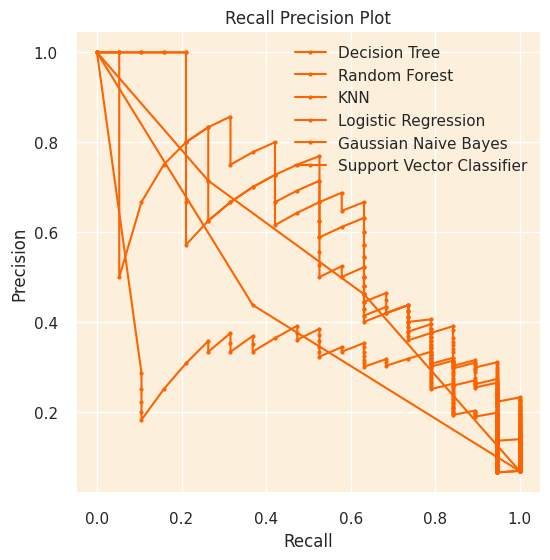

Decision Tree: AUC = 0.424
Random Forest: AUC = 0.652
K Nearest Neighbors: AUC = 0.540
Logistic Regression: AUC = 0.601
Gaussian Naive Bayes: AUC = 0.329
Support Vector Classifier: AUC = 0.557
----------------------------------------------------------------------------------------------------


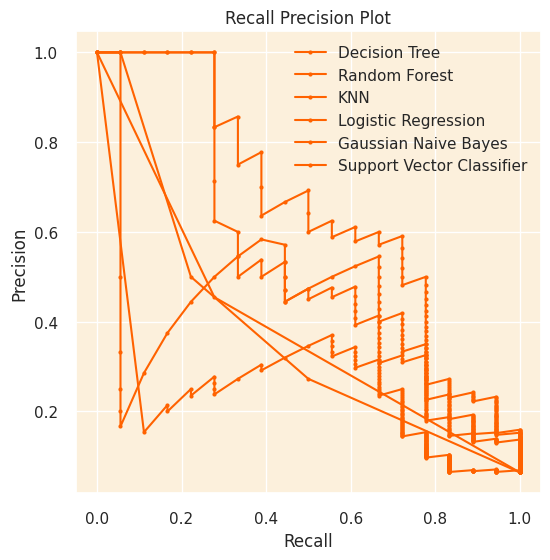

Decision Tree: AUC = 0.389
Random Forest: AUC = 0.552
K Nearest Neighbors: AUC = 0.372
Logistic Regression: AUC = 0.650
Gaussian Naive Bayes: AUC = 0.296
Support Vector Classifier: AUC = 0.371
----------------------------------------------------------------------------------------------------


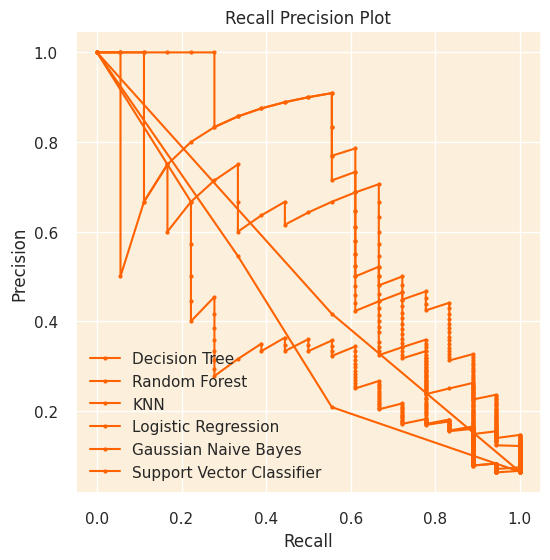

Decision Tree: AUC = 0.500
Random Forest: AUC = 0.659
K Nearest Neighbors: AUC = 0.402
Logistic Regression: AUC = 0.652
Gaussian Naive Bayes: AUC = 0.383
Support Vector Classifier: AUC = 0.555
----------------------------------------------------------------------------------------------------


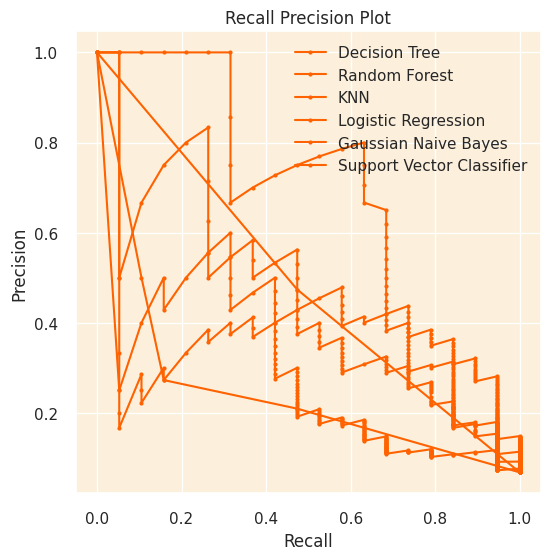

Decision Tree: AUC = 0.492
Random Forest: AUC = 0.653
K Nearest Neighbors: AUC = 0.248
Logistic Regression: AUC = 0.465
Gaussian Naive Bayes: AUC = 0.288
Support Vector Classifier: AUC = 0.384
----------------------------------------------------------------------------------------------------


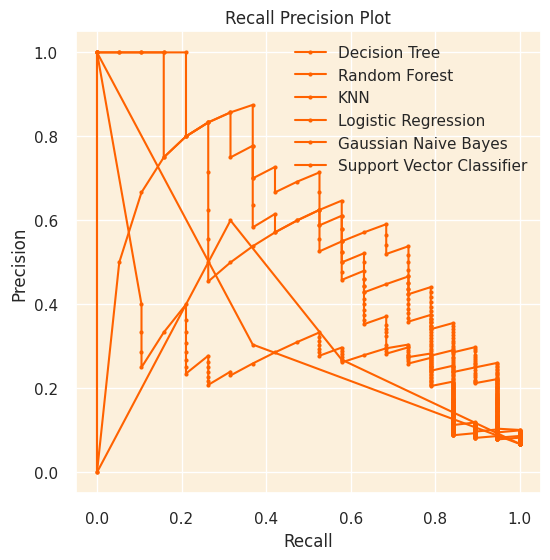

Decision Tree: AUC = 0.358
Random Forest: AUC = 0.553
K Nearest Neighbors: AUC = 0.280
Logistic Regression: AUC = 0.612
Gaussian Naive Bayes: AUC = 0.296
Support Vector Classifier: AUC = 0.513
----------------------------------------------------------------------------------------------------
Decision Tree: Mean AUC = 0.433
Random Forest: Mean AUC = 0.614
K Nearest Neighbors: Mean AUC = 0.368
Logistic Regression: Mean AUC = 0.596
Gaussian Naive Bayes: Mean AUC = 0.318
Support Vector Classifier: Mean AUC = 0.476


In [93]:
from sklearn.metrics import auc, precision_recall_curve
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

#These are to save each Area Under Curve for each model, so we can see the mean
dt_aucs = []
rf_aucs = []
knn_aucs = []
lr_aucs = []
gnb_aucs = []
svc_aucs = []

opening_weekend_ss = StandardScaler()
domestic_gross_ss = StandardScaler()
foreign_gross_ss = StandardScaler()
worldwide_gross_ss = StandardScaler()
budget_ss = StandardScaler()
# We will do KFold validation to ensure we are not overfitting the model
# also we use stratified because the True/False ratio is 7:100, which means that if we didn't use the stratify strategy, 
# it would be very likely that none of the training data would be of class True, and the model would be just classifying everything as false
cv = StratifiedKFold(n_splits=5, shuffle=True)

for i, (train_index, test_index) in enumerate(cv.split(X, y)):
    # Set the train and test sets
    train_X = X.iloc[train_index]
    train_y = y.iloc[train_index]
    test_X = X.iloc[test_index]
    test_y = y.iloc[test_index]

    # We need to scale the data inside the validation loop, so we don't leak any information about the test part of the dataset
    train_X.loc[:, "OPENING_WEEKEND"] = opening_weekend_ss.fit_transform(train_X[['OPENING_WEEKEND']])
    train_X.loc[:, "DOMESTIC_GROSS"] = domestic_gross_ss.fit_transform(train_X[['DOMESTIC_GROSS']])
    train_X.loc[:, "FOREIGN_GROSS"] = foreign_gross_ss.fit_transform(train_X[['FOREIGN_GROSS']])
    train_X.loc[:, "WORLDWIDE_GROSS"] = worldwide_gross_ss.fit_transform(train_X[['WORLDWIDE_GROSS']])
    train_X.loc[:, "BUDGET"] = budget_ss.fit_transform(train_X[['BUDGET']])

    # Transform the test data with the fitted scaler
    test_X.loc[:, "OPENING_WEEKEND"] = opening_weekend_ss.transform(test_X[['OPENING_WEEKEND']])
    test_X.loc[:, "DOMESTIC_GROSS"] = domestic_gross_ss.transform(test_X[['DOMESTIC_GROSS']])
    test_X.loc[:, "FOREIGN_GROSS"] = foreign_gross_ss.transform(test_X[['FOREIGN_GROSS']])
    test_X.loc[:, "WORLDWIDE_GROSS"] = worldwide_gross_ss.transform(test_X[['WORLDWIDE_GROSS']])
    test_X.loc[:, "BUDGET"] = budget_ss.transform(test_X[['BUDGET']])

    # Fit every model
    dt.fit(train_X, train_y)
    rf.fit(train_X, train_y)
    knn.fit(train_X, train_y)
    lr.fit(train_X, train_y)
    gnb.fit(train_X, train_y)
    svc.fit(train_X, train_y)

    # Get the prediction the model made (in probabilities, not class)
    dt_probs = dt.predict_proba(test_X)
    rf_probs = rf.predict_proba(test_X)
    knn_probs = knn.predict_proba(test_X)
    lr_probs = lr.predict_proba(test_X)
    gnb_probs = gnb.predict_proba(test_X)
    svc_probs = svc.predict_proba(test_X)

    # Get the probability for the class True
    dt_probs = dt_probs[:, 1]
    rf_probs = rf_probs[:, 1]
    knn_probs = knn_probs[:, 1]
    lr_probs = lr_probs[:, 1]
    gnb_probs = gnb_probs[:, 1]
    svc_probs = svc_probs[:, 1]
    #Get all the precisions and recalls
    dt_precision, dt_recall, _ = precision_recall_curve(test_y, dt_probs)
    rf_precision, rf_recall, _ = precision_recall_curve(test_y, rf_probs)
    knn_precision, knn_recall, _ = precision_recall_curve(test_y, knn_probs)
    lr_precision, lr_recall, _ = precision_recall_curve(test_y, lr_probs)
    gnb_precision, gnb_recall, _ = precision_recall_curve(test_y, gnb_probs)
    svc_precision, svc_recall, _ = precision_recall_curve(test_y, svc_probs)

    # Get the area under the curve for all the precision/recall curves
    dt_auc = auc(dt_recall, dt_precision)
    rf_auc = auc(rf_recall, rf_precision)
    knn_auc = auc(knn_recall, knn_precision)
    lr_auc = auc(lr_recall, lr_precision)
    gnb_auc = auc(gnb_recall, gnb_precision)
    svc_auc = auc(svc_recall, svc_precision)

    # Saving the Areas Under Curve for each model
    dt_aucs.append(dt_auc)
    rf_aucs.append(rf_auc)
    knn_aucs.append(knn_auc)
    lr_aucs.append(lr_auc)
    gnb_aucs.append(gnb_auc)
    svc_aucs.append(svc_auc)

    # Plot all the recall/precision curves and 
    plt.figure(figsize=(6, 6))
    plt.plot(dt_recall, dt_precision, marker='.', label='Decision Tree')
    plt.plot(rf_recall, rf_precision, marker='.', label='Random Forest')
    plt.plot(knn_recall, knn_precision, marker='.', label='KNN')
    plt.plot(lr_recall, lr_precision, marker='.', label='Logistic Regression')
    plt.plot(gnb_recall, gnb_precision, marker='.', label='Gaussian Naive Bayes')
    plt.plot(svc_recall, svc_precision, marker='.', label='Support Vector Classifier')

    plt.title('Recall Precision Plot')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    plt.show()
    print(f"Decision Tree: AUC = {dt_auc:.3f}")
    print(f"Random Forest: AUC = {rf_auc:.3f}")
    print(f"K Nearest Neighbors: AUC = {knn_auc:.3f}")
    print(f"Logistic Regression: AUC = {lr_auc:.3f}")
    print(f"Gaussian Naive Bayes: AUC = {gnb_auc:.3f}")
    print(f"Support Vector Classifier: AUC = {svc_auc:.3f}")
    print('-' * 100)

print(f"Decision Tree: Mean AUC = {np.mean(dt_aucs):.3f}")
print(f"Random Forest: Mean AUC = {np.mean(rf_aucs):.3f}")
print(f"K Nearest Neighbors: Mean AUC = {np.mean(knn_aucs):.3f}")
print(f"Logistic Regression: Mean AUC = {np.mean(lr_aucs):.3f}")
print(f"Gaussian Naive Bayes: Mean AUC = {np.mean(gnb_aucs):.3f}")
print(f"Support Vector Classifier: Mean AUC = {np.mean(svc_aucs):.3f}")


### The results on the plots and Mean AUCs above are not very desirable, both are very low. But why is this happening? Let's train a single model and see the confusion matrix and classification report to see if something seems wrong.

In [94]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y)
lr.fit(train_X, train_y)
y_pred = lr.predict(test_X)

print(confusion_matrix(test_y, y_pred))
print('-' * 100)
print(classification_report(test_y, y_pred))

[[315  17]
 [ 13   6]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

       False       0.96      0.95      0.95       332
        True       0.26      0.32      0.29        19

    accuracy                           0.91       351
   macro avg       0.61      0.63      0.62       351
weighted avg       0.92      0.91      0.92       351


### We can observe that while the precision and the recall for the False class is very high, the same cannot be said for the True class. This is because there is a massive imbalance in the classes of the data. And because of the imbalance of the classes, the loss will prioritize to classify the majority data to get the best score. As we are trying to guess if a movie will get an Oscar, we need to have high precision and recall in both classes. 

Text(0.5, 1.0, 'Percentage of Each class in the Dataset')

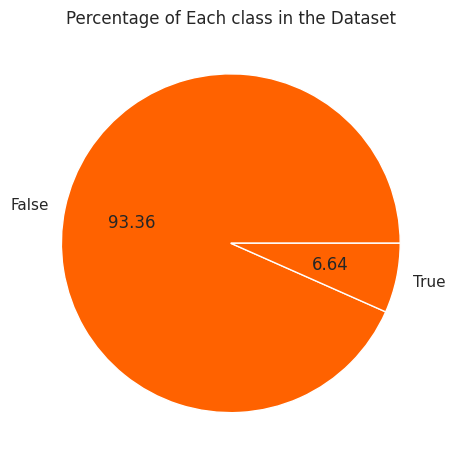

In [95]:
ax = y.value_counts().plot.pie(autopct='%.2f')
ax.set_ylabel('')
ax.set_title('Percentage of Each class in the Dataset')

## There are multiple ways to deal with this problem
- Undersampling
- Oversampling
### I believe that the dataset is too small to undersample, so we will have to go with the other choice
### Following <a href="https://imbalanced-learn.org/stable/over_sampling.html">this tutorial</a> I chose to go with simple SMOTE as the transformed dataset only has numerical values (the multiple-hot encoding counts as a numerical value)

Text(0.5, 1.0, 'Percentage of Each class in the Dataset')

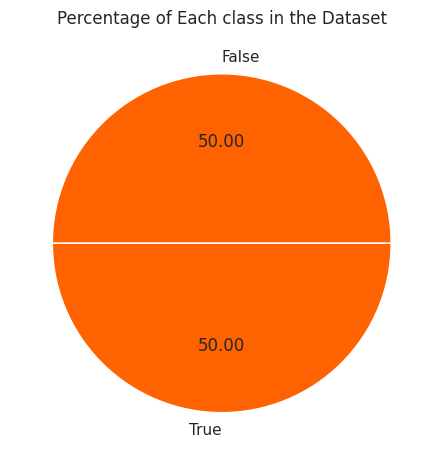

In [96]:
from imblearn.over_sampling import BorderlineSMOTE

X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X, y)
ax = y_resampled.value_counts().plot.pie(autopct='%.2f')
ax.set_ylabel('')
ax.set_title('Percentage of Each class in the Dataset')

### Let's run the test on the classifiers again. But we will use SMOTE only on the training dataset,we can not manipulate the test's set distribution, cause if we do that we will get incorrect results that don't represent future inputs.

In [97]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

class_weights = None
dt = DecisionTreeClassifier(class_weight=class_weights)
rf = RandomForestClassifier(n_estimators=1000, class_weight=class_weights)
knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(max_iter=10000, class_weight=class_weights)
gnb = GaussianNB()
svc = SVC(probability=True, class_weight=class_weights)

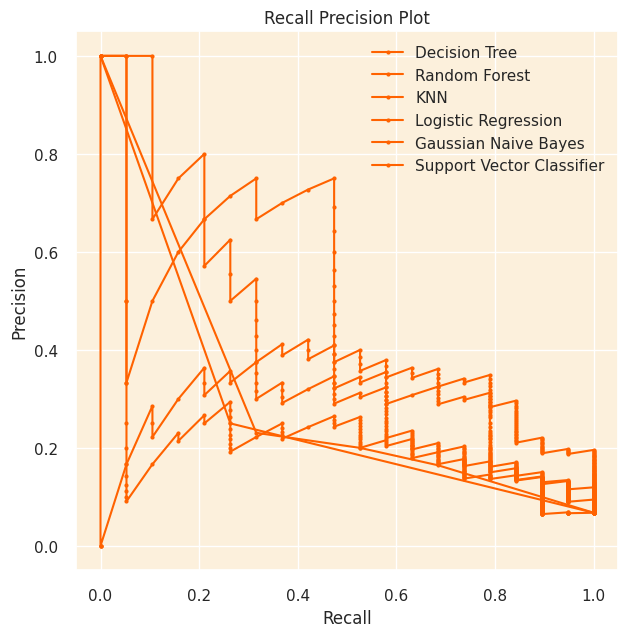

Decision Tree: AUC = 0.281
Random Forest: AUC = 0.458
K Nearest Neighbors: AUC = 0.305
Logistic Regression: AUC = 0.448
Gaussian Naive Bayes: AUC = 0.241
Support Vector Classifier: AUC = 0.236
              precision    recall  f1-score   support

       False       0.95      0.96      0.96       262
        True       0.38      0.32      0.34        19

    accuracy                           0.92       281
   macro avg       0.66      0.64      0.65       281
weighted avg       0.91      0.92      0.91       281

----------------------------------------------------------------------------------------------------


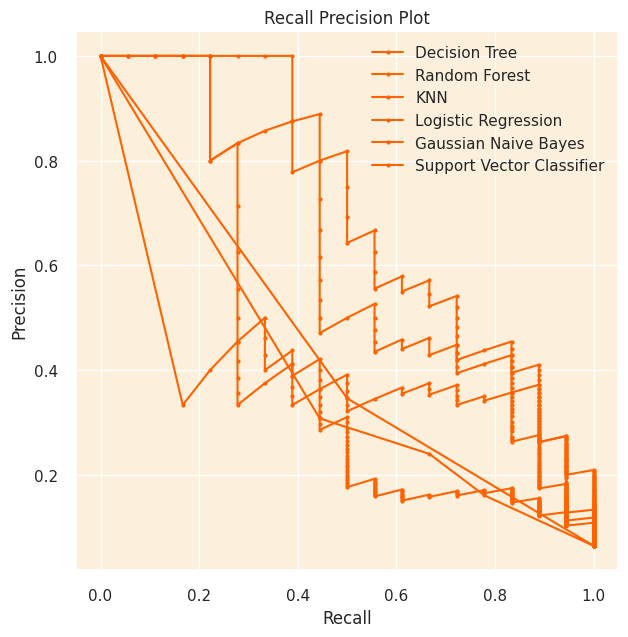

Decision Tree: AUC = 0.439
Random Forest: AUC = 0.619
K Nearest Neighbors: AUC = 0.399
Logistic Regression: AUC = 0.709
Gaussian Naive Bayes: AUC = 0.393
Support Vector Classifier: AUC = 0.431
              precision    recall  f1-score   support

       False       0.97      0.99      0.98       262
        True       0.75      0.50      0.60        18

    accuracy                           0.96       280
   macro avg       0.86      0.74      0.79       280
weighted avg       0.95      0.96      0.95       280

----------------------------------------------------------------------------------------------------


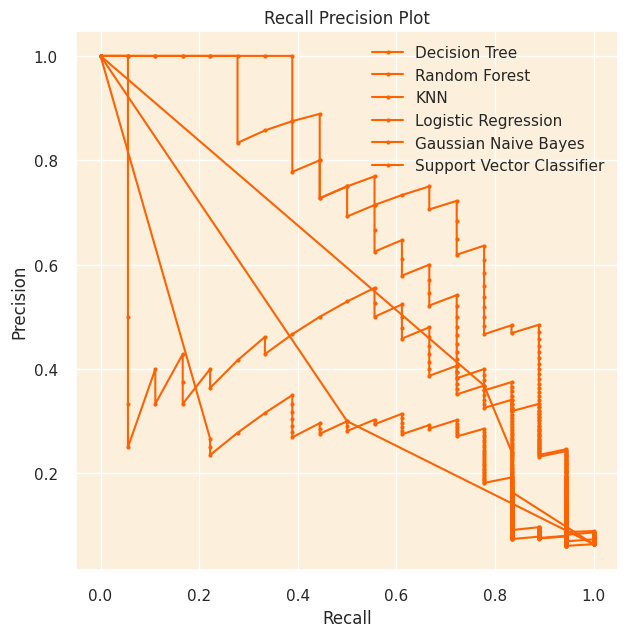

Decision Tree: AUC = 0.416
Random Forest: AUC = 0.695
K Nearest Neighbors: AUC = 0.568
Logistic Regression: AUC = 0.724
Gaussian Naive Bayes: AUC = 0.326
Support Vector Classifier: AUC = 0.401
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       262
        True       0.68      0.72      0.70        18

    accuracy                           0.96       280
   macro avg       0.83      0.85      0.84       280
weighted avg       0.96      0.96      0.96       280

----------------------------------------------------------------------------------------------------


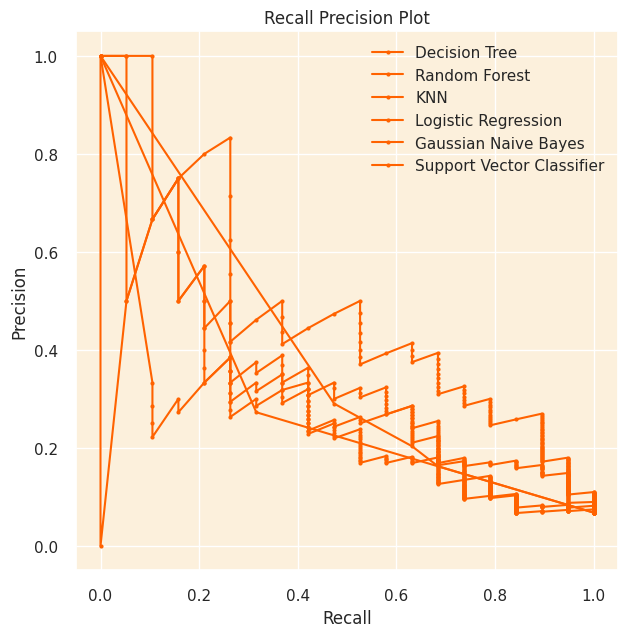

Decision Tree: AUC = 0.317
Random Forest: AUC = 0.370
K Nearest Neighbors: AUC = 0.391
Logistic Regression: AUC = 0.461
Gaussian Naive Bayes: AUC = 0.266
Support Vector Classifier: AUC = 0.268
              precision    recall  f1-score   support

       False       0.97      0.96      0.96       261
        True       0.50      0.53      0.51        19

    accuracy                           0.93       280
   macro avg       0.73      0.74      0.74       280
weighted avg       0.93      0.93      0.93       280

----------------------------------------------------------------------------------------------------


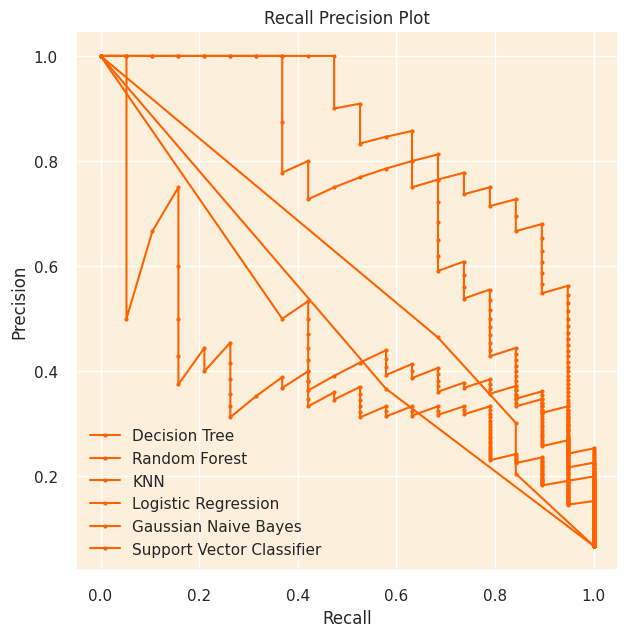

Decision Tree: AUC = 0.487
Random Forest: AUC = 0.742
K Nearest Neighbors: AUC = 0.583
Logistic Regression: AUC = 0.848
Gaussian Naive Bayes: AUC = 0.468
Support Vector Classifier: AUC = 0.428
              precision    recall  f1-score   support

       False       0.97      0.99      0.98       261
        True       0.85      0.58      0.69        19

    accuracy                           0.96       280
   macro avg       0.91      0.79      0.83       280
weighted avg       0.96      0.96      0.96       280

----------------------------------------------------------------------------------------------------
Decision Tree: Mean AUC = 0.388
Random Forest: Mean AUC = 0.577
K Nearest Neighbors: Mean AUC = 0.449
Logistic Regression: Mean AUC = 0.638
Gaussian Naive Bayes: Mean AUC = 0.339
Support Vector Classifier: Mean AUC = 0.353


In [98]:
from sklearn.metrics import auc, precision_recall_curve
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from numpy import argmax
#These are to save each Area Under Curve for each model, so we can see the mean
dt_aucs = []
rf_aucs = []
knn_aucs = []
lr_aucs = []
gnb_aucs = []
svc_aucs = []
# We will do KFold validation to ensure we are not overfitting the model
# also we use stratified because the True/False ratio is 7:100, which means that if we didn't use the stratify strategy, it would be very likely that none of the training data would be of class True, and the model would be just classifying everything as false
cv = StratifiedKFold(n_splits=5, shuffle=True)

for i, (train_index, test_index) in enumerate(cv.split(X, y)):
    # Set the train and test sets
    train_X = X.iloc[train_index]
    train_y = y.iloc[train_index]
    test_X = X.iloc[test_index]
    test_y = y.iloc[test_index]
    
    # Using SMOTE to bring the distribution of the classes to 50/50 so the classifier isn't affected this strongly
    # from the majority class.
    train_X,train_y = BorderlineSMOTE().fit_resample(train_X,train_y)
    

    # We need to scale the data inside the validation loop, so we don't leak any information about the test part of the dataset
    train_X.loc[:, "OPENING_WEEKEND"] = opening_weekend_ss.fit_transform(train_X[['OPENING_WEEKEND']])
    train_X.loc[:, "DOMESTIC_GROSS"] = domestic_gross_ss.fit_transform(train_X[['DOMESTIC_GROSS']])
    train_X.loc[:, "FOREIGN_GROSS"] = foreign_gross_ss.fit_transform(train_X[['FOREIGN_GROSS']])
    train_X.loc[:, "WORLDWIDE_GROSS"] = worldwide_gross_ss.fit_transform(train_X[['WORLDWIDE_GROSS']])
    train_X.loc[:, "BUDGET"] = budget_ss.fit_transform(train_X[['BUDGET']])

    test_X.loc[:, "OPENING_WEEKEND"] = opening_weekend_ss.transform(test_X[['OPENING_WEEKEND']])
    test_X.loc[:, "DOMESTIC_GROSS"] = domestic_gross_ss.transform(test_X[['DOMESTIC_GROSS']])
    test_X.loc[:, "FOREIGN_GROSS"] = foreign_gross_ss.transform(test_X[['FOREIGN_GROSS']])
    test_X.loc[:, "WORLDWIDE_GROSS"] = worldwide_gross_ss.transform(test_X[['WORLDWIDE_GROSS']])
    test_X.loc[:, "BUDGET"] = budget_ss.transform(test_X[['BUDGET']])

    # Fit every model
    dt.fit(train_X, train_y)
    rf.fit(train_X, train_y)
    knn.fit(train_X, train_y)
    lr.fit(train_X, train_y)
    gnb.fit(train_X, train_y)
    svc.fit(train_X, train_y)

    # Get the prediction the model made (in probabilities, not class)
    dt_probs = dt.predict_proba(test_X)
    rf_probs = rf.predict_proba(test_X)
    knn_probs = knn.predict_proba(test_X)
    lr_probs = lr.predict_proba(test_X)
    gnb_probs = gnb.predict_proba(test_X)
    svc_probs = svc.predict_proba(test_X)

    # Get the probability for the class True
    dt_probs = dt_probs[:, 1]
    rf_probs = rf_probs[:, 1]
    knn_probs = knn_probs[:, 1]
    lr_probs = lr_probs[:, 1]
    gnb_probs = gnb_probs[:, 1]
    svc_probs = svc_probs[:, 1]
    #Get all the precisions and recalls
    dt_precision, dt_recall, _ = precision_recall_curve(test_y, dt_probs)
    rf_precision, rf_recall, _ = precision_recall_curve(test_y, rf_probs)
    knn_precision, knn_recall, _ = precision_recall_curve(test_y, knn_probs)
    lr_precision, lr_recall, _ = precision_recall_curve(test_y, lr_probs)
    gnb_precision, gnb_recall, _ = precision_recall_curve(test_y, gnb_probs)
    svc_precision, svc_recall, _ = precision_recall_curve(test_y, svc_probs)
    
    # Get the area under the curve for all the precision/recall curves
    dt_auc = auc(dt_recall, dt_precision)
    rf_auc = auc(rf_recall, rf_precision)
    knn_auc = auc(knn_recall, knn_precision)
    lr_auc = auc(lr_recall, lr_precision)
    gnb_auc = auc(gnb_recall, gnb_precision)
    svc_auc = auc(svc_recall, svc_precision)

    # Saving the Areas Under Curve for each model
    dt_aucs.append(dt_auc)
    rf_aucs.append(rf_auc)
    knn_aucs.append(knn_auc)
    lr_aucs.append(lr_auc)
    gnb_aucs.append(gnb_auc)
    svc_aucs.append(svc_auc)

    # Plot all the recall/precision curves and 
    plt.figure(figsize=(7, 7))
    plt.plot(dt_recall, dt_precision, marker='.', label='Decision Tree')
    plt.plot(rf_recall, rf_precision, marker='.', label='Random Forest')
    plt.plot(knn_recall, knn_precision, marker='.', label='KNN')
    plt.plot(lr_recall, lr_precision, marker='.', label='Logistic Regression')
    plt.plot(gnb_recall, gnb_precision, marker='.', label='Gaussian Naive Bayes')
    plt.plot(svc_recall, svc_precision, marker='.', label='Support Vector Classifier')

    plt.title('Recall Precision Plot')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    plt.show()
    lr_probs = lr.predict(test_X)
    print(f"Decision Tree: AUC = {dt_auc:.3f}")
    print(f"Random Forest: AUC = {rf_auc:.3f}")
    print(f"K Nearest Neighbors: AUC = {knn_auc:.3f}")
    print(f"Logistic Regression: AUC = {lr_auc:.3f}")
    print(f"Gaussian Naive Bayes: AUC = {gnb_auc:.3f}")
    print(f"Support Vector Classifier: AUC = {svc_auc:.3f}")
    print(classification_report(test_y,lr_probs))
    # print(confusion_matrix(test_y,lr_probs))
    print('-' * 100)

print(f"Decision Tree: Mean AUC = {np.mean(dt_aucs):.3f}")
print(f"Random Forest: Mean AUC = {np.mean(rf_aucs):.3f}")
print(f"K Nearest Neighbors: Mean AUC = {np.mean(knn_aucs):.3f}")
print(f"Logistic Regression: Mean AUC = {np.mean(lr_aucs):.3f}")
print(f"Gaussian Naive Bayes: Mean AUC = {np.mean(gnb_aucs):.3f}")
print(f"Support Vector Classifier: Mean AUC = {np.mean(svc_aucs):.3f}")



### We can see that Logistic Regression and Random Forest have the best Mean Area Under the Curve. I will use both and check the prediction between them to make the final decision.

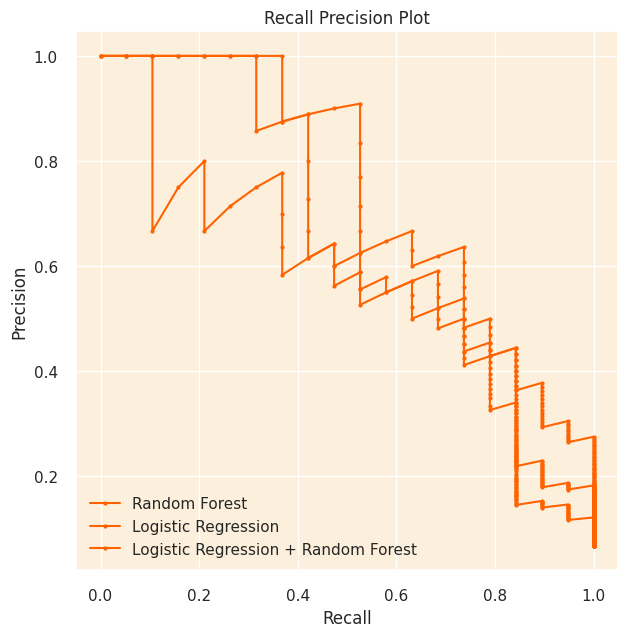

Random Forest: AUC = 0.568
Logistic Regression: AUC = 0.695
Logistic Regression + Random Forest: AUC = 0.712
Best Threshold for Logistic Regression + Random Forest: 0.9092614988601575


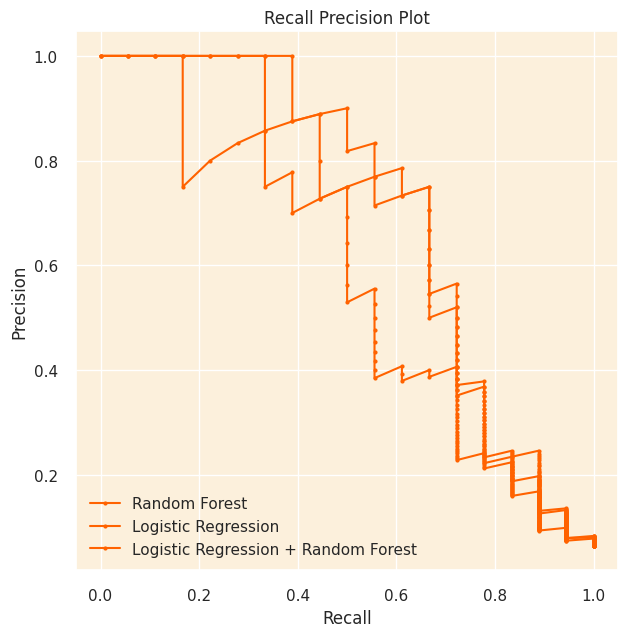

Random Forest: AUC = 0.611
Logistic Regression: AUC = 0.643
Logistic Regression + Random Forest: AUC = 0.697
Best Threshold for Logistic Regression + Random Forest: 1.2581492750206535


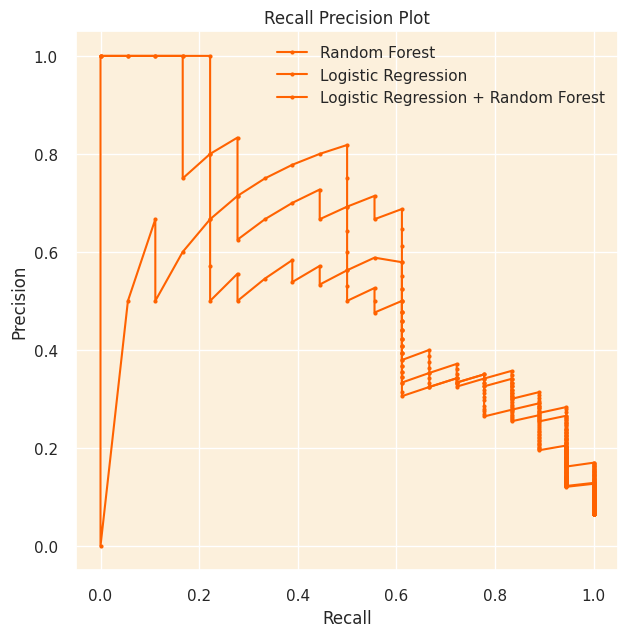

Random Forest: AUC = 0.612
Logistic Regression: AUC = 0.432
Logistic Regression + Random Forest: AUC = 0.591
Best Threshold for Logistic Regression + Random Forest: 0.9231057860494256


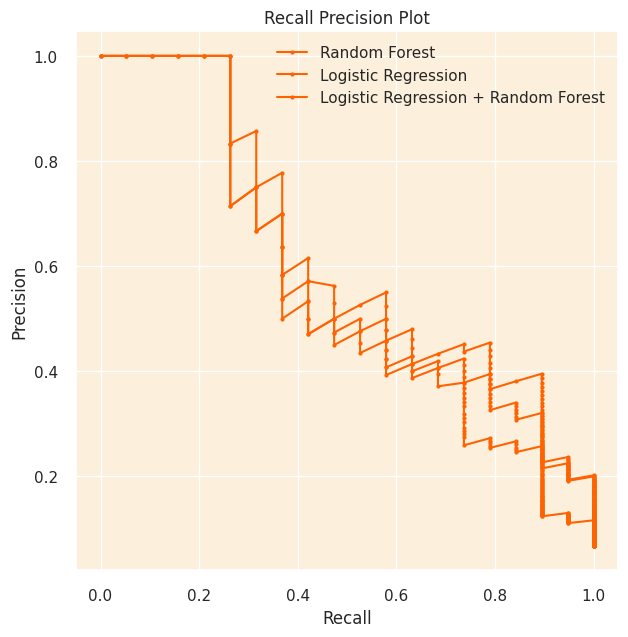

Random Forest: AUC = 0.571
Logistic Regression: AUC = 0.596
Logistic Regression + Random Forest: AUC = 0.594
Best Threshold for Logistic Regression + Random Forest: 0.9678346984523198


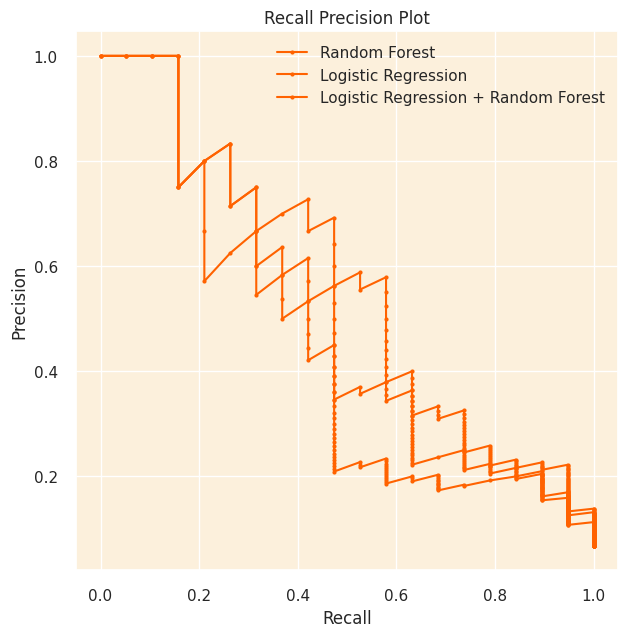

Random Forest: AUC = 0.467
Logistic Regression: AUC = 0.515
Logistic Regression + Random Forest: AUC = 0.524
Best Threshold for Logistic Regression + Random Forest: 0.8629858463938241
Random Forest: Mean AUC = 0.566
Logistic Regression: Mean AUC = 0.576
Logistic Regression + Random Forest: AUC = 0.623


In [99]:

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import auc, precision_recall_curve
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

#These are to save each Area Under Curve for each model, so we can see the mean
rf_aucs = []
lr_aucs = []
lr_plus_rf_aucs= []

# We will do KFold validation to ensure we are not overfitting the model
# also we use stratified because the True/False ratio is 7:100, which means that if we didn't use the stratify strategy, it would be very likely that none of the training data would be of class True, and the model would be just classifying everything as false
cv = StratifiedKFold(n_splits=5, shuffle=True)

for i, (train_index, test_index) in enumerate(cv.split(X, y)):
    # Set the train and test sets
    train_X = X.iloc[train_index]
    train_y = y.iloc[train_index]
    test_X = X.iloc[test_index]
    test_y = y.iloc[test_index]
    
    train_X,train_y = BorderlineSMOTE().fit_resample(train_X,train_y)

    

    # We need to scale the data inside the validation loop, so we don't leak any information about the test part of the dataset
    train_X.loc[:, "OPENING_WEEKEND"] = opening_weekend_ss.fit_transform(train_X[['OPENING_WEEKEND']])
    train_X.loc[:, "DOMESTIC_GROSS"] = domestic_gross_ss.fit_transform(train_X[['DOMESTIC_GROSS']])
    train_X.loc[:, "FOREIGN_GROSS"] = foreign_gross_ss.fit_transform(train_X[['FOREIGN_GROSS']])
    train_X.loc[:, "WORLDWIDE_GROSS"] = worldwide_gross_ss.fit_transform(train_X[['WORLDWIDE_GROSS']])
    train_X.loc[:, "BUDGET"] = budget_ss.fit_transform(train_X[['BUDGET']])

    test_X.loc[:, "OPENING_WEEKEND"] = opening_weekend_ss.transform(test_X[['OPENING_WEEKEND']])
    test_X.loc[:, "DOMESTIC_GROSS"] = domestic_gross_ss.transform(test_X[['DOMESTIC_GROSS']])
    test_X.loc[:, "FOREIGN_GROSS"] = foreign_gross_ss.transform(test_X[['FOREIGN_GROSS']])
    test_X.loc[:, "WORLDWIDE_GROSS"] = worldwide_gross_ss.transform(test_X[['WORLDWIDE_GROSS']])
    test_X.loc[:, "BUDGET"] = budget_ss.transform(test_X[['BUDGET']])

    # Fit every model
    rf.fit(train_X, train_y)
    lr.fit(train_X, train_y)

    # Get the prediction the model made (in probabilities, not class)
    rf_probs = rf.predict_proba(test_X)
    lr_probs = lr.predict_proba(test_X)


    # Get the probability for the class True
    rf_probs = rf_probs[:, 1]
    lr_probs = lr_probs[:, 1]
    lr_plus_rf_probs = lr_probs + rf_probs

    #Get all the precisions and recalls

    rf_precision, rf_recall, _ = precision_recall_curve(test_y, rf_probs)
    lr_precision, lr_recall, _ = precision_recall_curve(test_y, lr_probs)
    lr_plus_rf_precision,lr_plus_rf_recall,lr_plus_rf_threshold = precision_recall_curve(test_y,lr_plus_rf_probs)

    lr_plus_rf_fscore = (2 * lr_plus_rf_precision * lr_plus_rf_recall) / (lr_plus_rf_precision+lr_plus_rf_recall)
    ix = argmax(lr_plus_rf_fscore)
    lr_plus_rf_best_threshold = lr_plus_rf_threshold[ix]

    # Get the area under the curve for all the precision/recall curves
    rf_auc = auc(rf_recall, rf_precision)
    lr_auc = auc(lr_recall, lr_precision)
    lr_plus_rf_auc = auc(lr_plus_rf_recall,lr_plus_rf_precision)

    # Saving the Areas Under Curve for each model
    rf_aucs.append(rf_auc)
    lr_aucs.append(lr_auc)
    lr_plus_rf_aucs.append(lr_plus_rf_auc)

    
    # Plot all the recall/precision curves and 
    plt.figure(figsize=(7, 7))
    plt.plot(rf_recall, rf_precision, marker='.', label='Random Forest')
    plt.plot(lr_recall, lr_precision, marker='.', label='Logistic Regression')
    plt.plot(lr_plus_rf_recall, lr_plus_rf_precision, marker='.', label='Logistic Regression + Random Forest')

    plt.title('Recall Precision Plot')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    plt.show()

    print(f"Random Forest: AUC = {rf_auc:.3f}")
    print(f"Logistic Regression: AUC = {lr_auc:.3f}")
    print(f"Logistic Regression + Random Forest: AUC = {lr_plus_rf_auc:.3f}")
    print(f"Best Threshold for Logistic Regression + Random Forest: {lr_plus_rf_best_threshold}")


print(f"Random Forest: Mean AUC = {np.mean(rf_aucs):.3f}")
print(f"Logistic Regression: Mean AUC = {np.mean(lr_aucs):.3f}")
print(f"Logistic Regression + Random Forest: AUC = {np.mean(lr_plus_rf_aucs):.3f}")



In [100]:
lr_plus_rf_predict = [(pred>=lr_plus_rf_best_threshold).astype('int') for pred in lr_plus_rf_probs]
print(classification_report(test_y,lr_plus_rf_predict))
print(confusion_matrix(test_y,lr_plus_rf_predict))

              precision    recall  f1-score   support

       False       0.96      0.98      0.97       261
        True       0.69      0.47      0.56        19

    accuracy                           0.95       280
   macro avg       0.83      0.73      0.77       280
weighted avg       0.94      0.95      0.95       280

[[257   4]
 [ 10   9]]


### We can see that by combining the two classifiers we can have an even better AUC than using either one individually, and the model is not overfitted because we are using K-Fold validation 

### Let's import the anonymous validation data for the assignment and fit them to the train data
#### To do this, we will follow each step we did on <a href="#A)-Data-Preprocessing">Part 1</a>.

In [101]:
anon_df = pd.read_excel('./data/movies_test_anon_full.xlsx')
anon_df.head()

,ID,Film,Year,Script Type,Rotten Tomatoes critics,Metacritic critics,Average critics,Rotten Tomatoes Audience,Metacritic Audience,Rotten Tomatoes vs Metacritic deviance,Average audience,Audience vs Critics deviance,Primary Genre,Genre,Opening Weekend,Opening weekend ($million),Domestic Gross,Domestic gross ($million),Foreign Gross ($million),Foreign Gross,Worldwide Gross,Worldwide Gross ($million),of Gross earned abroad,Budget ($million),Budget recovered,Budget recovered opening weekend,Distributor,IMDb Rating,IMDB vs RT disparity,Release Date (US)
0,1,???,2019,original screenplay,73,-,-,80,-,-,-,-,NaN,action,21000000,21,3640355,3.6,62.5,62525155,66165510,66.2,94.4,21,3.1507,1,Yash Raj Films,6.5,15.0,"October 2, 2019"
1,2,???,2022,NaN,40,-,40,84,-,-,84,-44,comedy,family,1399373,1.4,3973263,4,-,-,-,-,-,-,-,-,Roadside Attraction,4.9,35.0,NaN
2,3,???,2019,sequel,32,40,36,94,66,28,80,-44,NaN,comedy,8901419,8.9,21360215,21.4,0,0,21360215,21.4,0,44,0.4855,0.2023,Warner Bros. Pictures,6.4,30.0,"June 14, 2019"
3,4,???,2022,NaN,70,60,65,73,66,7,70,-5,drama,"fantasy, romance",2919717,2.9,8286741,8.3,13,12959213,21245954,21.2,0.61,60,0.3541,0.0487,Roadshow Entertainment,6.7,6.0,NaN
4,5,???,2018,remake,86,42,64,70,44,26,57,7,NaN,"romance, comedy",14711101,14.7,50316123,50,41,40928790,91244913,912,0.4486,12,7.6037,1.2259,NaN,6.9,NaN,"May 4, 2018"


In [102]:
# In addition to the columns we dropped on the preprocessing part, we also drop `ID` and `Film` because they are not needed
anon_df.drop(columns=['Average critics ', 'Rotten Tomatoes vs Metacritic  deviance',
                      'Average audience ', 'Audience vs Critics deviance ', 'Opening weekend ($million)',
                      'Domestic gross ($million)',
                      'Foreign Gross ($million)', 'Worldwide Gross ($million)', ' of Gross earned abroad',
                      ' Budget recovered', ' Budget recovered opening weekend', 'Primary Genre', 'Distributor',
                      'Film'], inplace=True)

In [103]:
# Renaming all the columns based on the names of the training dataframe
anon_df.columns = [x.upper().strip() for x in anon_df.columns]
try:
    anon_df.rename(columns=
    {
        'YEAR': 'RELEASE_YEAR',
        'SCRIPT TYPE': 'SCRIPT_TYPE',
        'ROTTEN TOMATOES  CRITICS': 'RT_CRITICS',
        'METACRITIC  CRITICS': 'MC_CRITICS',
        'ROTTEN TOMATOES AUDIENCE': 'RT_AUDIENCE',
        'METACRITIC AUDIENCE': 'MC_AUDIENCE',
        'OPENING WEEKEND': 'OPENING_WEEKEND',
        'DOMESTIC GROSS': 'DOMESTIC_GROSS',
        'FOREIGN GROSS': 'FOREIGN_GROSS',
        'WORLDWIDE GROSS': 'WORLDWIDE_GROSS',
        'BUDGET ($MILLION)': 'BUDGET',
        'IMDB RATING': 'IMDB_RATING',
        'IMDB VS RT DISPARITY': 'IMDB_RT_DIFFERENCE'},
        inplace=True)
except Exception as e:
    print(e)

In [104]:
anon_df.head()

,ID,RELEASE_YEAR,SCRIPT_TYPE,RT_CRITICS,MC_CRITICS,RT_AUDIENCE,MC_AUDIENCE,GENRE,OPENING_WEEKEND,DOMESTIC_GROSS,FOREIGN_GROSS,WORLDWIDE_GROSS,BUDGET,IMDB_RATING,IMDB_RT_DIFFERENCE,RELEASE DATE (US)
0,1,2019,original screenplay,73,-,80,-,action,21000000,3640355,62525155,66165510,21,6.5,15.0,"October 2, 2019"
1,2,2022,NaN,40,-,84,-,family,1399373,3973263,-,-,-,4.9,35.0,NaN
2,3,2019,sequel,32,40,94,66,comedy,8901419,21360215,0,21360215,44,6.4,30.0,"June 14, 2019"
3,4,2022,NaN,70,60,73,66,"fantasy, romance",2919717,8286741,12959213,21245954,60,6.7,6.0,NaN
4,5,2018,remake,86,42,70,44,"romance, comedy",14711101,50316123,40928790,91244913,12,6.9,NaN,"May 4, 2018"


### Checking how many missing values I need to handle

In [105]:
anon_df.isna().sum()

ID                      0
RELEASE_YEAR            0
SCRIPT_TYPE           193
RT_CRITICS              0
MC_CRITICS              0
RT_AUDIENCE             0
MC_AUDIENCE             0
GENRE                  66
OPENING_WEEKEND         0
DOMESTIC_GROSS          0
FOREIGN_GROSS         101
WORLDWIDE_GROSS         3
BUDGET                  0
IMDB_RATING             3
IMDB_RT_DIFFERENCE    160
RELEASE DATE (US)      92
dtype: int64

#### We can see that there are a lot of missing data in the given dataset , so we will apply all the data cleaning and preprocessing we did for the training dataset

In [106]:
anon_df['RT_CRITICS'] = anon_df['RT_CRITICS'].apply(lambda x: clean_general_float(x))
anon_df['RT_CRITICS'] = anon_df['RT_CRITICS'].fillna(df['RT_CRITICS'].mean())
anon_df['RT_CRITICS'] = anon_df['RT_CRITICS'].apply(lambda x: int(x))

anon_df['MC_CRITICS'] = anon_df['MC_CRITICS'].apply(lambda x: clean_general_float(x))
anon_df['MC_CRITICS'] = anon_df['MC_CRITICS'].fillna(df['MC_CRITICS'].mean())
anon_df['MC_CRITICS'] = anon_df['MC_CRITICS'].apply(lambda x: int(x))

anon_df['MC_AUDIENCE'] = anon_df['MC_AUDIENCE'].apply(lambda x: clean_general_float(x))
anon_df['MC_AUDIENCE'] = anon_df['MC_AUDIENCE'].fillna(df['MC_AUDIENCE'].mean())
anon_df['MC_AUDIENCE'] = anon_df['MC_AUDIENCE'].apply(lambda x: int(x))

anon_df['RT_AUDIENCE'] = anon_df['RT_AUDIENCE'].apply(lambda x: clean_general_float(x))
anon_df['RT_AUDIENCE'] = anon_df['RT_AUDIENCE'].fillna(df['RT_AUDIENCE'].mean())
anon_df['RT_AUDIENCE'] = anon_df['RT_AUDIENCE'].apply(lambda x: int(x))

anon_df['OPENING_WEEKEND'] = anon_df['OPENING_WEEKEND'].apply(lambda x: clean_general_float(x))
anon_df['OPENING_WEEKEND'] = anon_df['OPENING_WEEKEND'].fillna(df['OPENING_WEEKEND'].mean())

anon_df['DOMESTIC_GROSS'] = anon_df['DOMESTIC_GROSS'].apply(lambda x: clean_general_float(x))
anon_df['DOMESTIC_GROSS'] = anon_df['DOMESTIC_GROSS'].fillna(df['DOMESTIC_GROSS'].mean())

anon_df['FOREIGN_GROSS'] = anon_df['FOREIGN_GROSS'].apply(lambda x: clean_general_float(x))
anon_df['FOREIGN_GROSS'] = anon_df['FOREIGN_GROSS'].fillna(df['FOREIGN_GROSS'].mean())

anon_df['WORLDWIDE_GROSS'] = anon_df['WORLDWIDE_GROSS'].apply(lambda x: clean_general_float(x))
anon_df['WORLDWIDE_GROSS'] = anon_df['WORLDWIDE_GROSS'].fillna(df['WORLDWIDE_GROSS'].mean())

anon_df['BUDGET'] = anon_df['BUDGET'].apply(lambda x: clean_general_float(x) * 1_000_000)
anon_df['BUDGET'] = anon_df['BUDGET'].fillna(df['BUDGET'].mean())

# I fill all the missing dates with Jan 1 1970 ,as a "NaN" token
anon_df['RELEASE DATE (US)'] = anon_df['RELEASE DATE (US)'].fillna("1 Jan 1970")
# On the anon dataset there are some dates that have `(limited)` and then another date, I chose 
# to only keep the first date
anon_df['RELEASE DATE (US)'] = anon_df['RELEASE DATE (US)'].apply(lambda x: x.split('(')[0])
temp_date = pd.to_datetime(anon_df['RELEASE DATE (US)'], format='mixed')
anon_df['RELEASE_MONTH'] = temp_date.dt.month
anon_df['RELEASE_DAY'] = temp_date.dt.day

# We drop the original column because we don't need it anymore.
anon_df = anon_df.drop(columns="RELEASE DATE (US)")
anon_df['RELEASE_MONTH'] = anon_df['RELEASE_MONTH'].fillna(round(df['RELEASE_MONTH']))
anon_df['RELEASE_DAY'] = anon_df['RELEASE_DAY'].fillna(round(df['RELEASE_DAY']))

anon_df['IMDB_RATING'] = anon_df['IMDB_RATING'].apply(lambda x: x * 10)
anon_df['IMDB_RATING'] = anon_df['IMDB_RATING'].fillna(df['IMDB_RATING'].mean())

nan_imdb_rt_df = anon_df[anon_df['IMDB_RT_DIFFERENCE'].isna()]
anon_df.loc[anon_df['IMDB_RT_DIFFERENCE'].isna(), 'IMDB_RT_DIFFERENCE'] = (
        nan_imdb_rt_df['IMDB_RATING'] - nan_imdb_rt_df['RT_CRITICS'])

anon_df['SCRIPT_TYPE'] = anon_df['SCRIPT_TYPE'].fillna('-')
anon_df['GENRE'] = anon_df['GENRE'].fillna('-')


### We also need to fix the categorical columns for `anon_df` , refer to <a href="#Categorical-Columns">this part</a>

In [107]:
anon_df['SCRIPT_TYPE'] = anon_df['SCRIPT_TYPE'].apply(lambda x: x.upper())
anon_df['SCRIPT_TYPE'] = anon_df['SCRIPT_TYPE'].apply(lambda x: x.strip())
anon_df['SCRIPT_TYPE'] = anon_df['SCRIPT_TYPE'].apply(lambda x: x.replace('REMAKE / REBOOT', 'REMAKE'))

anon_df['GENRE'] = anon_df['GENRE'].apply(lambda x: x.upper())
anon_df['GENRE'] = anon_df['GENRE'].apply(lambda x: x.strip())
anon_df['GENRE'] = anon_df['GENRE'].apply(lambda x: x.replace('.', ','))
anon_df['GENRE'] = anon_df['GENRE'].apply(lambda x: x.rstrip(','))

anon_df['GENRE'] = anon_df['GENRE'].apply(lambda x: x.replace('II', 'I'))

anon_df['GENRE'] = anon_df['GENRE'].apply(lambda x: x.replace('THRILER', 'THRILLER'))

anon_df['GENRE'] = anon_df['GENRE'].apply(lambda x: x.replace('SPORTS', 'SPORT'))

anon_df['GENRE'] = anon_df['GENRE'].apply(lambda x: x.replace('MUSICAL', 'MUSIC'))

anon_df['GENRE'] = anon_df['GENRE'].apply(lambda x: x.replace('MUSIC', 'MUSICAL'))

anon_df['GENRE'] = anon_df['GENRE'].apply(lambda x: x.replace('HORROR', 'HORRO'))
anon_df['GENRE'] = anon_df['GENRE'].apply(lambda x: x.replace('HORRO', 'HORROR'))

In [108]:
get_unique_genres(anon_df)

{'-',
 'ACTION',
 'ADVENTURE',
 'ANIMATION',
 'BIOGRAPHY',
 'BLACK COMEDY',
 'COMEDY',
 'CRIME',
 'DRAMA',
 'FAMILY',
 'FANSTASY',
 'FANTASY',
 'HISTORY',
 'HOLIDAY',
 'HORROR',
 'HORROR/MYSTERY',
 'MUSICAL',
 'MYSTERY',
 'MYSTERY & THRILLER',
 'ROMANCE',
 'SCI-FI',
 'SPORT',
 'SUSPENSE',
 'THRILLER',
 'WAR',
 'WESTERN'}

In [109]:
get_unique_script_types(anon_df)

{'-',
 'ADAPTATION',
 'BASED ON A TRUE STORY',
 'ORIGINAL SCREENPLAY',
 'PREQUEL',
 'REMAKE',
 'SEMI-SEQUEL',
 'SEQUEL'}

### We don't care about the extra script types and genres the anonymous dataset has, as they haven't been passed through the model, so we only care about the ones in the original dataset. That's why to get the categorical columns for the anonymous dataset we need to check if the script types and genre the movies have fall inside of the original dataset

In [110]:
# Get all the script-types that the model was trained on
script_types = []
for col in df.columns:
    if col.startswith("SCRIPT_"):
        script_types.append(col[7:])

script_types

['ADAPTATION',
 'REMAKE',
 'ORIGINAL_SCREENPLAY',
 'SEQUEL',
 'BASED_ON_A_TRUE_STORY',
 'DOCUMENTARY',
 'PREQUEL']

In [111]:
# Get all the genres that the model was trained on
genres = []
for col in df.columns:
    if col.startswith('GENRE_'):
        genres.append(col[6:])
    
genres

['PERIOD',
 'ACTION',
 'WESTERN',
 'HORROR',
 'MUSICAL',
 'SCI-FI',
 'FAMILY',
 'COMEDY',
 'CRIME',
 'DRAMA',
 'ANIMATION',
 'SPORT',
 'WAR',
 'THRILLER',
 'FANTASY',
 'ADVENTURE',
 'ROMANTIC_COMEDY',
 'ROMANCE',
 'DOCUMENTARY',
 'BIOGRAPHY',
 'HISTORY',
 'MYSTERY']

In [112]:
# Fix the categorical column Script_Type of the anonymous dataset
anon_df[["SCRIPT_"+script for script in script_types]] = False
for index,row in anon_df.iterrows():
    for anon_script in row['SCRIPT_TYPE'].strip().rstrip(',').split(','):
        anon_script = anon_script.strip().replace(' ','_')
        if anon_script in script_types:
            anon_df.loc[index,"SCRIPT_"+anon_script] = True
anon_df.head()

,ID,RELEASE_YEAR,SCRIPT_TYPE,RT_CRITICS,MC_CRITICS,RT_AUDIENCE,MC_AUDIENCE,GENRE,OPENING_WEEKEND,DOMESTIC_GROSS,FOREIGN_GROSS,WORLDWIDE_GROSS,BUDGET,IMDB_RATING,IMDB_RT_DIFFERENCE,RELEASE_MONTH,RELEASE_DAY,SCRIPT_ADAPTATION,SCRIPT_REMAKE,SCRIPT_ORIGINAL_SCREENPLAY,SCRIPT_SEQUEL,SCRIPT_BASED_ON_A_TRUE_STORY,SCRIPT_DOCUMENTARY,SCRIPT_PREQUEL
0,1,2019,ORIGINAL SCREENPLAY,73,53,80,62,ACTION,21000000.0,3640355.0,6.252516e+07,6.616551e+07,2.100000e+07,65.0,15.0,10,2,False,False,True,False,False,False,False
1,2,2022,-,40,53,84,62,FAMILY,1399373.0,3973263.0,1.050258e+08,1.790031e+08,5.660620e+07,49.0,35.0,1,1,False,False,False,False,False,False,False
2,3,2019,SEQUEL,32,40,94,66,COMEDY,8901419.0,21360215.0,0.000000e+00,2.136022e+07,4.400000e+07,64.0,30.0,6,14,False,False,False,True,False,False,False
3,4,2022,-,70,60,73,66,"FANTASY, ROMANCE",2919717.0,8286741.0,1.295921e+07,2.124595e+07,6.000000e+07,67.0,6.0,1,1,False,False,False,False,False,False,False
4,5,2018,REMAKE,86,42,70,44,"ROMANCE, COMEDY",14711101.0,50316123.0,4.092879e+07,9.124491e+07,1.200000e+07,69.0,-17.0,5,4,False,True,False,False,False,False,False


In [113]:
# Fix the categorical column Genre of the anonymous dataset
anon_df[["GENRE_"+genre for genre in genres]] = False
for index,row in anon_df.iterrows():
    for anon_genre in row['GENRE'].strip().rstrip(',').split(','):
        anon_genre = anon_genre.strip().replace(' ','_')
        if anon_genre in genres:
            anon_df.loc[index,"GENRE_"+anon_genre] = True
anon_df.head()

,ID,RELEASE_YEAR,SCRIPT_TYPE,RT_CRITICS,MC_CRITICS,RT_AUDIENCE,MC_AUDIENCE,GENRE,OPENING_WEEKEND,DOMESTIC_GROSS,FOREIGN_GROSS,WORLDWIDE_GROSS,BUDGET,IMDB_RATING,IMDB_RT_DIFFERENCE,RELEASE_MONTH,RELEASE_DAY,SCRIPT_ADAPTATION,SCRIPT_REMAKE,SCRIPT_ORIGINAL_SCREENPLAY,SCRIPT_SEQUEL,SCRIPT_BASED_ON_A_TRUE_STORY,SCRIPT_DOCUMENTARY,SCRIPT_PREQUEL,GENRE_PERIOD,GENRE_ACTION,GENRE_WESTERN,GENRE_HORROR,GENRE_MUSICAL,GENRE_SCI-FI,GENRE_FAMILY,GENRE_COMEDY,GENRE_CRIME,GENRE_DRAMA,GENRE_ANIMATION,GENRE_SPORT,GENRE_WAR,GENRE_THRILLER,GENRE_FANTASY,GENRE_ADVENTURE,GENRE_ROMANTIC_COMEDY,GENRE_ROMANCE,GENRE_DOCUMENTARY,GENRE_BIOGRAPHY,GENRE_HISTORY,GENRE_MYSTERY
0,1,2019,ORIGINAL SCREENPLAY,73,53,80,62,ACTION,21000000.0,3640355.0,6.252516e+07,6.616551e+07,2.100000e+07,65.0,15.0,10,2,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,2022,-,40,53,84,62,FAMILY,1399373.0,3973263.0,1.050258e+08,1.790031e+08,5.660620e+07,49.0,35.0,1,1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,2019,SEQUEL,32,40,94,66,COMEDY,8901419.0,21360215.0,0.000000e+00,2.136022e+07,4.400000e+07,64.0,30.0,6,14,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,2022,-,70,60,73,66,"FANTASY, ROMANCE",2919717.0,8286741.0,1.295921e+07,2.124595e+07,6.000000e+07,67.0,6.0,1,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
4,5,2018,REMAKE,86,42,70,44,"ROMANCE, COMEDY",14711101.0,50316123.0,4.092879e+07,9.124491e+07,1.200000e+07,69.0,-17.0,5,4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [114]:
# We don't need these columns as they have been turned into multiple-hot encoding columns
anon_df.drop(columns=["GENRE","SCRIPT_TYPE"],inplace=True)

In [115]:
# Now let's calculate all the calculable columns we dropped before
anon_df['%OF_GROSS_EARNED_ABROAD'] = \
    (anon_df['FOREIGN_GROSS'] / anon_df['WORLDWIDE_GROSS']) * 100

anon_df['%BUDGET_RECOVERED'] = (anon_df['WORLDWIDE_GROSS'] / anon_df["BUDGET"]) * 100

anon_df['%BUDGET_RECOVERED_OPENING_WEEKEND'] = (anon_df["OPENING_WEEKEND"]/anon_df['BUDGET']) *100

anon_df['AVERAGE_CRITICS'] = (anon_df['RT_CRITICS'] + anon_df['MC_CRITICS']) / 2

anon_df['AVERAGE_AUDIENCE'] = (anon_df['RT_AUDIENCE'] + anon_df['MC_AUDIENCE']) / 2

anon_df['RT_MC_AUDIENCE_DIFFERENCE'] = anon_df['RT_AUDIENCE'] - anon_df['MC_AUDIENCE']

anon_df['CRITICS_AUDIENCE_DIFFERENCE'] = \
    anon_df['AVERAGE_CRITICS'] - anon_df['AVERAGE_AUDIENCE']

In [116]:
# Reordering the rows of anonymous dataset to the order of the testing dataset because that's
# how the model expect the data to be ordered
columns_reordered = ["ID",*X.columns]
anon_df = anon_df[columns_reordered]

In [117]:
anon_df.head()

,ID,RELEASE_YEAR,RT_CRITICS,MC_CRITICS,RT_AUDIENCE,MC_AUDIENCE,OPENING_WEEKEND,DOMESTIC_GROSS,FOREIGN_GROSS,WORLDWIDE_GROSS,BUDGET,IMDB_RATING,IMDB_RT_DIFFERENCE,SCRIPT_ADAPTATION,SCRIPT_REMAKE,SCRIPT_ORIGINAL_SCREENPLAY,SCRIPT_SEQUEL,SCRIPT_BASED_ON_A_TRUE_STORY,SCRIPT_DOCUMENTARY,SCRIPT_PREQUEL,GENRE_PERIOD,GENRE_ACTION,GENRE_WESTERN,GENRE_HORROR,GENRE_MUSICAL,GENRE_SCI-FI,GENRE_FAMILY,GENRE_COMEDY,GENRE_CRIME,GENRE_DRAMA,GENRE_ANIMATION,GENRE_SPORT,GENRE_WAR,GENRE_THRILLER,GENRE_FANTASY,GENRE_ADVENTURE,GENRE_ROMANTIC_COMEDY,GENRE_ROMANCE,GENRE_DOCUMENTARY,GENRE_BIOGRAPHY,GENRE_HISTORY,GENRE_MYSTERY,%OF_GROSS_EARNED_ABROAD,%BUDGET_RECOVERED,%BUDGET_RECOVERED_OPENING_WEEKEND,AVERAGE_CRITICS,AVERAGE_AUDIENCE,RT_MC_AUDIENCE_DIFFERENCE,CRITICS_AUDIENCE_DIFFERENCE,RELEASE_MONTH,RELEASE_DAY
0,1,2019,73,53,80,62,21000000.0,3640355.0,6.252516e+07,6.616551e+07,2.100000e+07,65.0,15.0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,94.498108,315.073857,100.000000,63.0,71.0,18,-8.0,10,2
1,2,2022,40,53,84,62,1399373.0,3973263.0,1.050258e+08,1.790031e+08,5.660620e+07,49.0,35.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,58.672626,316.225212,2.472119,46.5,73.0,22,-26.5,1,1
2,3,2019,32,40,94,66,8901419.0,21360215.0,0.000000e+00,2.136022e+07,4.400000e+07,64.0,30.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.000000,48.545943,20.230498,36.0,80.0,28,-44.0,6,14
3,4,2022,70,60,73,66,2919717.0,8286741.0,1.295921e+07,2.124595e+07,6.000000e+07,67.0,6.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,60.996145,35.409923,4.866195,65.0,69.5,7,-4.5,1,1
4,5,2018,86,42,70,44,14711101.0,50316123.0,4.092879e+07,9.124491e+07,1.200000e+07,69.0,-17.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,44.855969,760.374275,122.592508,64.0,57.0,26,7.0,5,4


In [118]:
# Creating the prediction function
def get_lr_plus_rf_prediction(df:pd.DataFrame):
    lr_probs = lr.predict_proba(df)[:,1]
    rf_probs = rf.predict_proba(df)[:,1]
    
    lr_plus_rf_probs = lr_probs + rf_probs
    return [(pred>=lr_plus_rf_best_threshold) for pred in lr_plus_rf_probs]

    
    

In [119]:
# Scale all the columns we scaled at training time
anon_df.loc[:, "OPENING_WEEKEND"] = opening_weekend_ss.transform(anon_df[['OPENING_WEEKEND']])
anon_df.loc[:, "DOMESTIC_GROSS"] = domestic_gross_ss.transform(anon_df[['DOMESTIC_GROSS']])
anon_df.loc[:, "FOREIGN_GROSS"] = foreign_gross_ss.transform(anon_df[['FOREIGN_GROSS']])
anon_df.loc[:, "WORLDWIDE_GROSS"] = worldwide_gross_ss.transform(anon_df[['WORLDWIDE_GROSS']])
anon_df.loc[:, "BUDGET"] = budget_ss.transform(anon_df[['BUDGET']])
# Get the prediction
predictions = get_lr_plus_rf_prediction(anon_df.drop(columns=['ID']))
predictions = [int(pred) for pred in predictions]
# Drop all columns except `ID`
for col in anon_df.columns:
    if col != "ID":
        anon_df = anon_df.drop(columns=col)
# Add predictions to dataframe
anon_df['OSCAR'] = predictions


anon_df.head()

,ID,OSCAR
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [120]:
anon_df['OSCAR'].value_counts()

OSCAR
0    455
1    110
Name: count, dtype: int64

### We can see a low amount of oscars won, which is expected as the model did have an Oscar Won distribution of 7:100


In [121]:
anon_df.to_csv("data/predictions.csv",index=False)

# C) Clustering
#### I tried doing clustering by myself (without a blog guide), like I did with the previous steps, but the results were not good at all. So most of the clustering step is an augmentation of [this guide](https://www.kaggle.com/code/farzadnekouei/customer-segmentation-recommendation-system).

In [122]:
import seaborn as sns
df.head()

,RELEASE_YEAR,RT_CRITICS,MC_CRITICS,RT_AUDIENCE,MC_AUDIENCE,OPENING_WEEKEND,DOMESTIC_GROSS,FOREIGN_GROSS,WORLDWIDE_GROSS,BUDGET,IMDB_RATING,IMDB_RT_DIFFERENCE,WON_OSCAR,SCRIPT_ADAPTATION,SCRIPT_REMAKE,SCRIPT_ORIGINAL_SCREENPLAY,SCRIPT_SEQUEL,SCRIPT_BASED_ON_A_TRUE_STORY,SCRIPT_DOCUMENTARY,SCRIPT_PREQUEL,GENRE_PERIOD,GENRE_ACTION,GENRE_WESTERN,GENRE_HORROR,GENRE_MUSICAL,GENRE_SCI-FI,GENRE_FAMILY,GENRE_COMEDY,GENRE_CRIME,GENRE_DRAMA,GENRE_ANIMATION,GENRE_SPORT,GENRE_WAR,GENRE_THRILLER,GENRE_FANTASY,GENRE_ADVENTURE,GENRE_ROMANTIC_COMEDY,GENRE_ROMANCE,GENRE_DOCUMENTARY,GENRE_BIOGRAPHY,GENRE_HISTORY,GENRE_MYSTERY,%OF_GROSS_EARNED_ABROAD,%BUDGET_RECOVERED,%BUDGET_RECOVERED_OPENING_WEEKEND,AVERAGE_CRITICS,AVERAGE_AUDIENCE,RT_MC_AUDIENCE_DIFFERENCE,CRITICS_AUDIENCE_DIFFERENCE,RELEASE_MONTH,RELEASE_DAY
0,2007,60,51,89,71,70885301.0,210614939.0,245453242.0,456068181.0,65000000.0,76.00000,16.00000,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,53.819418,701.643355,109.054309,55.5,80.0,18,-24.5,3,9
1,2007,88,76,86,73,14035033.0,53606916.0,16173815.0,69780731.0,50000000.0,77.00000,-11.00000,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,23.178053,139.561462,28.070066,82.0,79.5,13,2.5,9,7
2,2007,50,53,56,65,15951902.0,39568996.0,35526091.0,75095087.0,32000000.0,66.00000,16.00000,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,47.308143,234.672147,49.849694,51.5,60.5,-9,-9.0,10,19
3,2007,54,56,82,73,3824988.0,24343673.0,5023470.0,29367143.0,45000000.0,73.00000,19.00000,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,17.105750,65.260318,8.499973,55.0,77.5,9,-22.5,10,12
4,2007,14,29,31,45,10059425.0,41797066.0,87086650.0,128883716.0,40000000.0,64.83558,50.83558,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,67.569940,322.209290,25.148563,21.5,38.0,-14,-16.5,12,25


## Print the correlation graph

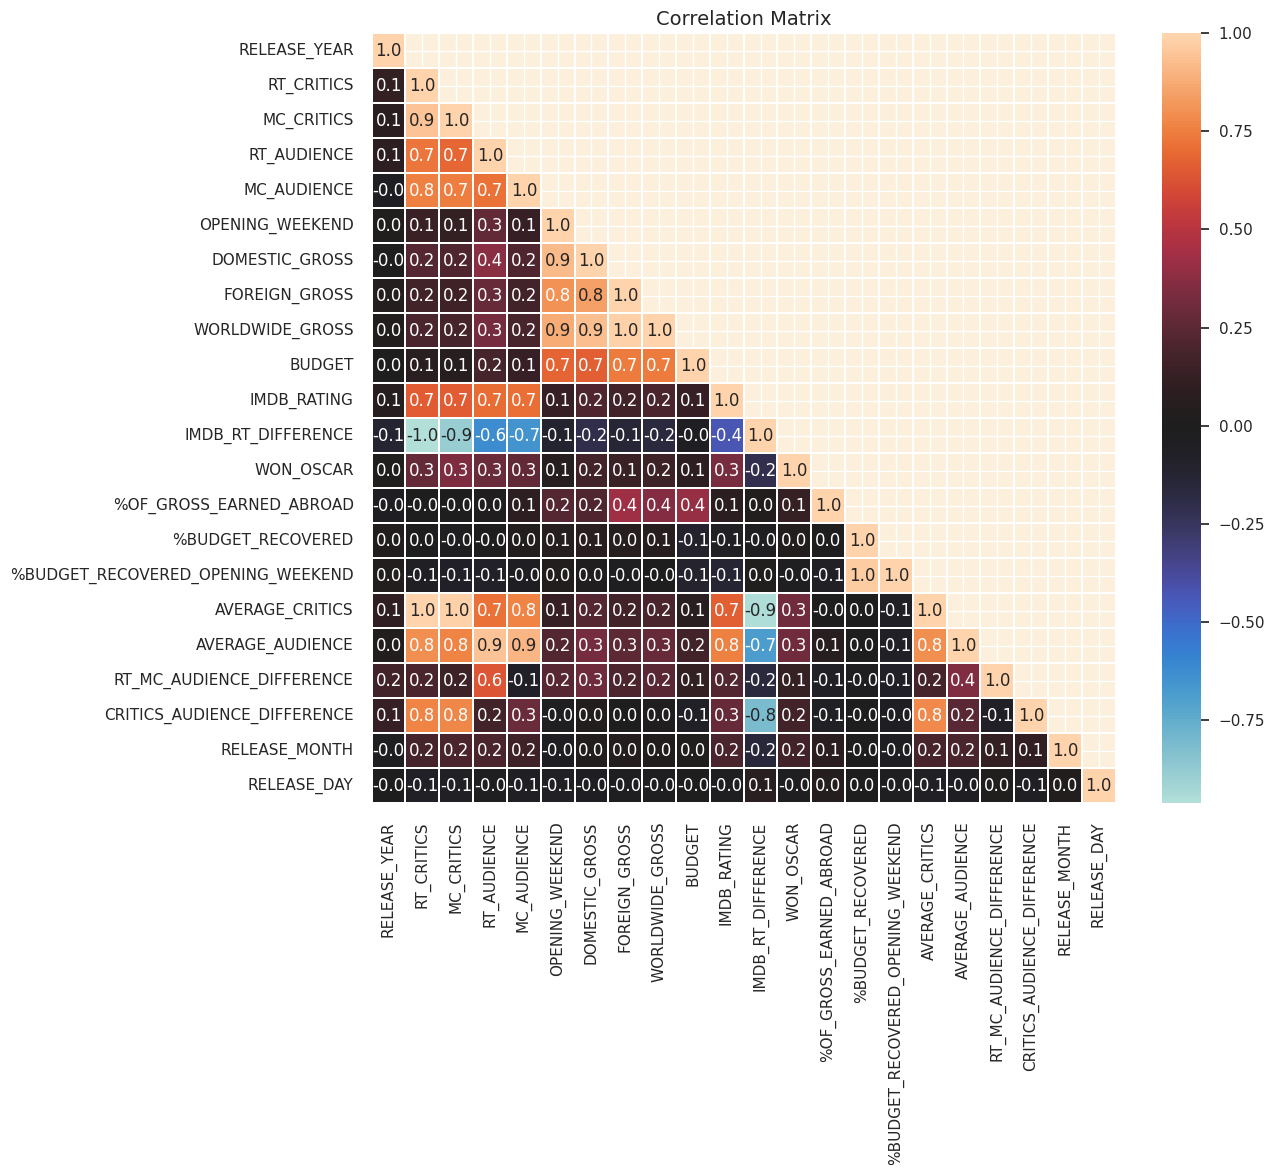

In [123]:
from matplotlib.colors import LinearSegmentedColormap
# sns.set_style('whitegrid')

# Drop the categorical columns because they make the correlation graph illegible
_df = df.copy()
for col in _df.columns:
    if col.startswith("GENRE") or col.startswith("SCRIPT"):
        _df.drop(columns=[col],inplace=True,axis=1)

corr = _df.corr()

# Define a custom colormap
# colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
# my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, center=0, fmt='.1f', linewidths=0.2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

## Observations
- We can see that `AVERAGE_CRITICS` AND `AVERAGE_AUDIENCE` are positively correlated with the income of the film , and slightly positively correlated with the `BUDGET`
- The opinion of `AVERAGE_CRITICS` does very positively correlate with the opinion of `AVERAGE_AUDIENCE`
- It seems that the opinion of critics and audience are way more important for if a movie get's an oscar than the budget and income of the movie

In [188]:
from sklearn.preprocessing import normalize
pre_pca_scaler = StandardScaler()
df_scaled = pre_pca_scaler.fit_transform(df)
df_scaled = normalize(df_scaled)
df_scaled = pd.DataFrame(df_scaled,columns=df.columns)

In [189]:
df_scaled.head()

,RELEASE_YEAR,RT_CRITICS,MC_CRITICS,RT_AUDIENCE,MC_AUDIENCE,OPENING_WEEKEND,DOMESTIC_GROSS,FOREIGN_GROSS,WORLDWIDE_GROSS,BUDGET,IMDB_RATING,IMDB_RT_DIFFERENCE,WON_OSCAR,SCRIPT_ADAPTATION,SCRIPT_REMAKE,SCRIPT_ORIGINAL_SCREENPLAY,SCRIPT_SEQUEL,SCRIPT_BASED_ON_A_TRUE_STORY,SCRIPT_DOCUMENTARY,SCRIPT_PREQUEL,GENRE_PERIOD,GENRE_ACTION,GENRE_WESTERN,GENRE_HORROR,GENRE_MUSICAL,GENRE_SCI-FI,GENRE_FAMILY,GENRE_COMEDY,GENRE_CRIME,GENRE_DRAMA,GENRE_ANIMATION,GENRE_SPORT,GENRE_WAR,GENRE_THRILLER,GENRE_FANTASY,GENRE_ADVENTURE,GENRE_ROMANTIC_COMEDY,GENRE_ROMANCE,GENRE_DOCUMENTARY,GENRE_BIOGRAPHY,GENRE_HISTORY,GENRE_MYSTERY,%OF_GROSS_EARNED_ABROAD,%BUDGET_RECOVERED,%BUDGET_RECOVERED_OPENING_WEEKEND,AVERAGE_CRITICS,AVERAGE_AUDIENCE,RT_MC_AUDIENCE_DIFFERENCE,CRITICS_AUDIENCE_DIFFERENCE,RELEASE_MONTH,RELEASE_DAY
0,-0.082728,0.012528,-0.008039,0.079179,0.030929,0.085758,0.080225,0.043540,0.058197,0.007778,0.069640,0.009963,-0.013692,0.074042,-0.010478,-0.043096,-0.022401,-0.014766,-0.001372,-0.001372,0.959632,0.086671,-0.003891,-0.016837,-0.008916,-0.016768,-0.014082,-0.037188,-0.017380,-0.024686,-0.015136,-0.006921,-0.006634,-0.024974,-0.015859,-0.025319,-0.004129,-0.019527,-0.003073,-0.009776,-0.007465,-0.012298,0.015335,0.011237,0.006086,0.004625,0.062626,0.079374,-0.057875,-0.057666,-0.042943
1,-0.108165,0.084710,0.085940,0.091964,0.050414,-0.021584,-0.015737,-0.036019,-0.029996,-0.008004,0.099209,-0.065972,-0.017902,-0.046562,0.329032,-0.056348,-0.029289,-0.019306,-0.001794,-0.001794,-0.003593,-0.039777,0.885935,-0.022014,-0.011657,-0.021924,-0.018412,-0.048623,-0.022724,-0.032276,-0.019790,-0.009050,-0.008674,-0.032653,-0.020736,-0.033104,-0.005399,-0.025531,-0.004018,-0.012781,-0.009761,-0.016079,-0.063757,-0.016359,-0.010144,0.086411,0.079540,0.076112,0.056213,0.042627,-0.072209
2,-0.360360,-0.026729,-0.009312,-0.078795,0.035034,-0.056888,-0.088360,-0.093864,-0.095071,-0.099324,0.031639,0.043397,-0.059643,0.322522,-0.045641,-0.187725,-0.097579,-0.064320,-0.005978,-0.005978,-0.011969,-0.132520,-0.016951,0.682175,-0.038837,-0.073042,-0.061342,-0.161989,-0.075707,-0.107529,-0.065933,-0.030150,-0.028897,-0.108786,-0.069082,-0.110289,-0.017985,-0.085058,-0.013386,-0.042582,-0.032519,-0.053570,0.007466,-0.036998,-0.017575,-0.020268,-0.031425,-0.152011,0.000134,0.207548,0.080496
3,-0.226830,0.003645,0.018410,0.160527,0.105722,-0.095621,-0.080149,-0.085014,-0.086178,-0.029489,0.139636,0.045723,-0.037542,-0.097643,-0.028729,0.167757,-0.061421,-0.040486,-0.003763,-0.003763,-0.007534,-0.083415,-0.010670,-0.046164,0.810887,-0.045976,-0.038612,-0.101964,-0.047654,-0.067685,-0.041502,-0.018978,-0.018190,-0.068476,-0.043484,-0.069422,-0.011321,-0.053540,-0.008426,-0.026804,-0.020469,-0.033720,-0.168531,-0.042915,-0.030445,0.009501,0.147161,0.113193,-0.138200,0.130641,-0.067221
4,-0.220504,-0.195449,-0.194457,-0.244624,-0.181904,-0.063062,-0.050578,-0.014825,-0.028060,-0.041016,0.000000,0.234334,-0.036495,-0.094920,-0.027928,-0.114869,0.313735,-0.039357,-0.003658,-0.003658,-0.007324,-0.081089,-0.010372,0.417422,-0.023764,0.419130,-0.037535,-0.099121,-0.046325,-0.065797,-0.040344,-0.018448,-0.017682,-0.066566,-0.042271,-0.067486,-0.011005,-0.052047,-0.008191,-0.026056,-0.019899,-0.032779,0.117542,-0.012781,-0.022010,-0.197869,-0.234019,-0.149418,-0.074600,0.207198,0.147485


## Plotting PCA to see optimal number of Principal Components

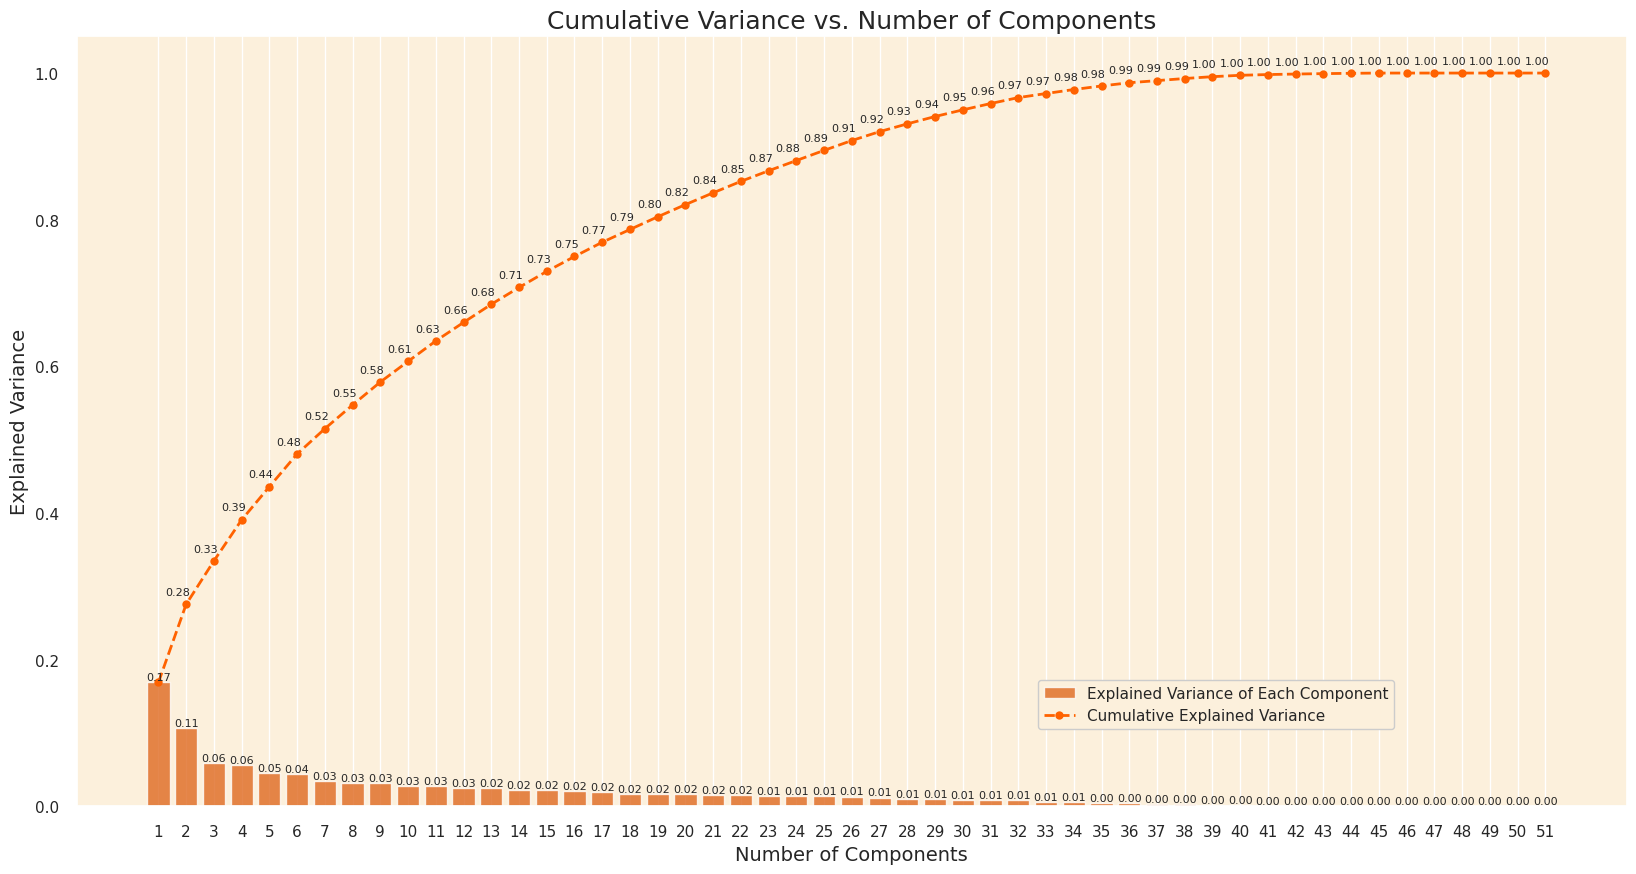

In [190]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA().fit(df_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)


# Set seaborn plot style
# sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      # color='#fcc36d',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', 
                     # color='#ff6200',
                     linewidth=2)


# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,  
           # edgecolor='#ff6200'
           )  

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=8)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=8)

plt.grid(axis='both')   
plt.show()

## We can see that at 31 components we have 95% cumulative explained variance, which is good enough

In [191]:
pca = PCA(n_components=31)

# Fitting and transforming the original data to the new PCA dataframe
df_pca = pca.fit_transform(df)

# Renaming columns
df_pca = pd.DataFrame(df_pca, columns=[f'PC{str(i + 1)}' for i in range(pca.n_components_)])

df_pca.index = df.index

In [192]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31
0,3.342486e+08,7.129723e+07,2.401258e+07,-9.239838e+06,44135.709107,-183.218706,13.512407,9.096665,8.071753,33.936841,-1.195238,6.442259,-1.510348,-5.863384,2.560850,-6.230415,0.645452,0.116183,-0.457308,0.151252,0.064755,0.183702,-0.157329,-0.585312,0.042006,0.093201,0.078923,0.094363,-0.357570,-0.161190,-0.091623
1,-1.404920e+08,1.895165e+07,-1.620450e+07,3.369829e+06,692205.879510,-184.736202,-1.194733,-67.370887,-14.533861,12.025476,-6.547261,7.666609,-7.893083,-0.711044,-2.338571,-5.850420,0.117594,0.217427,0.564828,-0.014904,-0.016124,-0.237457,-0.212466,-0.334846,-0.026201,0.011295,0.066391,-0.121312,0.085308,0.160077,-0.008850
2,-1.319888e+08,1.649809e+06,6.271108e+06,-3.717736e+06,24683.157396,-239.102689,-11.504217,-1.870396,8.303376,-1.181608,7.733111,-3.679920,-1.789908,0.325765,-4.287402,-3.797024,0.844597,-0.102272,0.111824,-0.428858,0.012139,-0.337283,-0.221481,-0.575562,0.148438,-0.195999,0.082718,-0.319760,-0.131137,0.160616,-0.170207
3,-1.875150e+08,-3.859028e+06,-1.320925e+07,5.005784e+06,509240.625728,-210.427730,-12.463572,-14.737270,-26.178039,32.405616,5.988550,3.673979,-3.442489,1.206776,-3.531229,-4.449542,-0.571311,0.278138,0.113564,-0.234000,0.149708,-0.247073,-0.221930,-0.354617,-0.032167,-0.150056,-0.132736,0.118853,-0.014329,-0.280520,0.003004
4,-6.090540e+07,-2.108149e+07,1.277023e+07,2.884034e+06,-97587.332966,-132.733510,-3.320636,80.097518,18.602290,-12.959780,4.775924,-8.579650,-10.083901,-6.206847,-6.483546,-3.426830,0.260924,0.207007,1.090565,-0.010195,0.089793,-0.169329,-0.579280,-0.232063,0.809832,-0.272481,-0.343093,0.025218,0.350104,0.137008,-0.102862


In [193]:
pc_df = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)],  
                     index=df.columns)
pc_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31
RELEASE_YEAR,3.280014e-10,-6.225965e-09,4.134668e-09,-2.374043e-08,-2.878060e-08,0.000080,0.001110,-0.008798,-0.019367,-0.001767,-0.054575,-0.001145,-0.011818,-0.105463,0.208681,0.969322,-0.013624,-0.010286,-0.014219,0.012475,-0.012291,-0.024576,-0.007643,0.007500,-0.015520,0.001558,0.004644,0.001035,0.011363,0.006336,0.003386
RT_CRITICS,1.709201e-08,8.337455e-08,6.949323e-08,4.502361e-07,-2.290274e-07,-0.000611,0.103678,-0.533811,0.026537,-0.072348,-0.035816,-0.005641,0.039644,-0.496082,-0.022461,-0.055118,-0.000602,-0.001577,0.001452,-0.003550,0.001456,0.002988,-0.001501,-0.000311,-0.001286,-0.000480,0.000071,0.001137,-0.000928,-0.002153,0.002667
MC_CRITICS,1.021255e-08,4.779916e-08,4.466195e-08,3.256587e-07,-9.452572e-08,-0.000681,0.062394,-0.325009,0.030889,-0.059789,0.052841,-0.043196,-0.420341,0.667434,0.052465,0.056276,-0.002008,-0.000626,-0.001468,0.008573,-0.002539,-0.006119,0.001370,-0.000270,0.002137,-0.001625,0.000785,-0.001677,0.001134,0.002943,-0.006680
RT_AUDIENCE,1.780934e-08,7.809641e-08,2.374603e-08,2.942598e-07,-4.394488e-08,-0.000634,0.066064,-0.229687,-0.080375,0.573762,-0.165326,0.016532,0.052078,0.091572,0.013693,-0.004506,-0.002161,0.001349,-0.001118,0.001994,-0.001259,-0.003430,0.000372,-0.000580,0.000916,-0.000507,0.000735,-0.001500,0.000255,0.000927,-0.000778
MC_AUDIENCE,8.328970e-09,2.374182e-08,4.775324e-09,2.106551e-07,-1.270797e-07,0.000124,0.047886,-0.202278,0.061018,0.228794,0.551801,-0.008634,0.147345,0.067951,0.003851,0.039090,-0.001469,-0.003288,0.000891,-0.000035,0.000219,-0.000400,-0.000398,0.001120,-0.000115,0.000153,0.000255,0.000224,0.000886,-0.000458,0.000095


## Using the elbow method to figure out the best amount of clusters to use

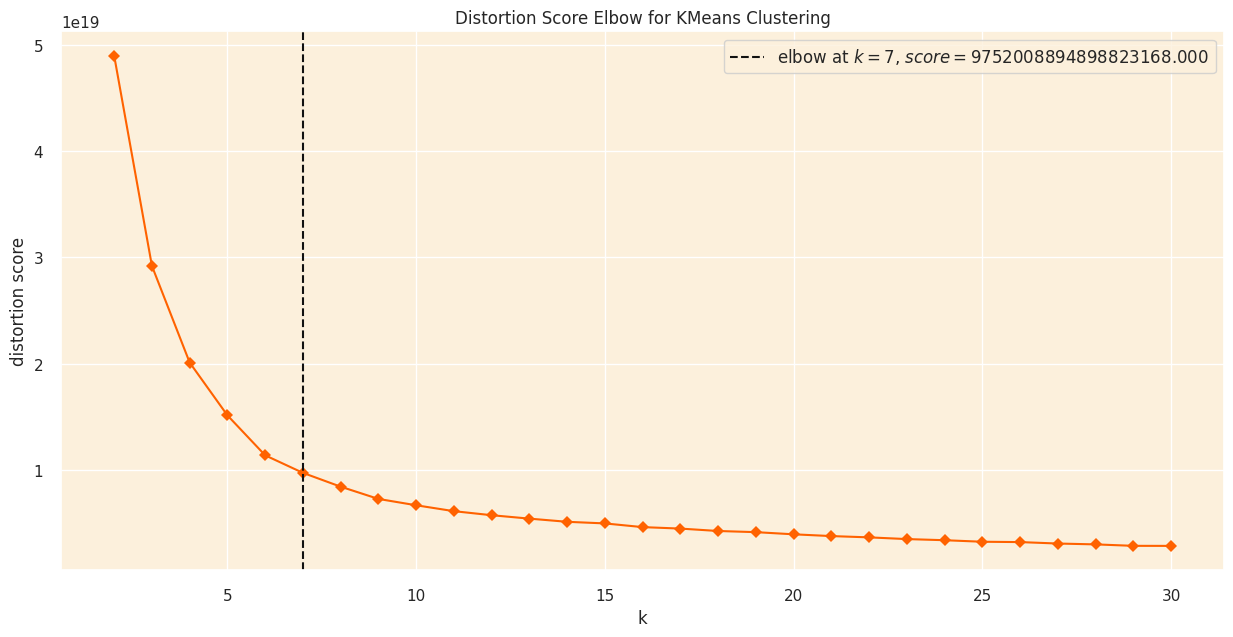

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [194]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})

sns.set_palette(['#ff6200'])
km = KMeans(random_state=0)
fig,ax = plt.subplots(figsize=(15,7))
visualizer = KElbowVisualizer(km,k=30,timings=False,ax=ax)
visualizer.fit(df_pca)
visualizer.show()

## Fit the model

In [195]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(df_pca)

KMeans(n_clusters=7)

## Print the number of items per cluster

In [206]:
pd.DataFrame(kmeans.labels_).iloc[:,0].value_counts()

0
2    798
0    318
6    139
1     69
5     54
3     21
4      2
Name: count, dtype: int64

In [217]:
df_clustered = pd.concat([df["WON_OSCAR"],pd.DataFrame(kmeans.labels_,columns=["CLUSTER"])],axis=1)
df_clustered.head()

,WON_OSCAR,CLUSTER
0,False,1
1,False,2
2,False,2
3,False,2
4,False,0


In [222]:
for cluster in df_clustered["CLUSTER"].unique():
    print(f"Cluster {cluster}")
    display(df_clustered[df_clustered["CLUSTER"] == cluster]["WON_OSCAR"].value_counts())

Cluster 1


WON_OSCAR
False    61
True      8
Name: count, dtype: int64

Cluster 2


WON_OSCAR
False    766
True      32
Name: count, dtype: int64

Cluster 0


WON_OSCAR
False    293
True      25
Name: count, dtype: int64

Cluster 6


WON_OSCAR
False    126
True      13
Name: count, dtype: int64

Cluster 5


WON_OSCAR
False    45
True      9
Name: count, dtype: int64

Cluster 4


WON_OSCAR
False    2
Name: count, dtype: int64

Cluster 3


WON_OSCAR
False    15
True      6
Name: count, dtype: int64

## We can't see a good result when it comes to clustering based on if the movies won an oscar
## Let's reduce the dimensions to 2 so we can graph it to see if the clusters are better

In [196]:
pca_pca = PCA(n_components=2).fit_transform(df_pca)
pca_pca = pd.DataFrame(pca_pca)
pca_pca.head()

,0,1
0,3.342486e+08,7.129723e+07
1,-1.404920e+08,1.895165e+07
2,-1.319888e+08,1.649809e+06
3,-1.875150e+08,-3.859028e+06
4,-6.090540e+07,-2.108149e+07


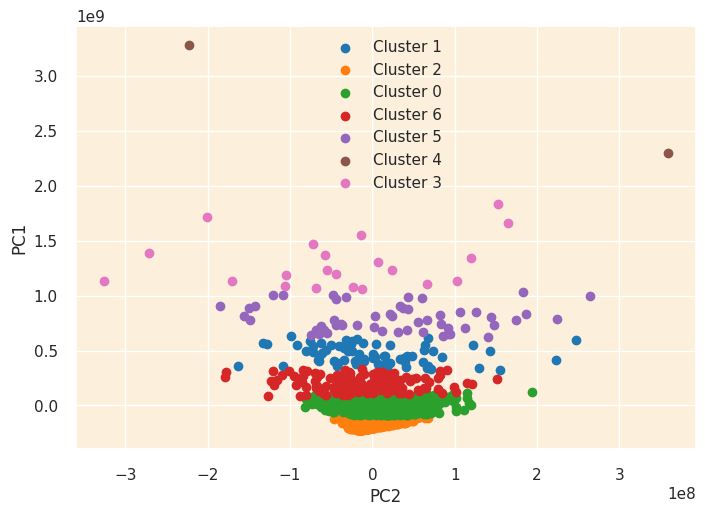

In [205]:
import math
from itertools import cycle
import matplotlib.cm as cm
colors = cycle(cm.tab10.colors)
labels  =  pd.DataFrame(kmeans.labels_,columns=["CLUSTER"])

for i in labels["CLUSTER"].unique():
    color = next(colors)
    idx = labels["CLUSTER"] == i
    plt.scatter(y=pca_pca[idx][0],x=pca_pca[idx][1],color=color,label=f"Cluster {i}")
# plt.scatter(y=df["IMDB_RATING"],x=df["RT_CRITICS"],c=df_scaled["CLUSTER"])
plt.xlabel("PC2")
plt.ylabel("PC1")
plt.legend()
plt.show()


## We can see that this aproach doesn't lead to good results
## Let's try in to cluster based on the two most correlated factor with won_oscar

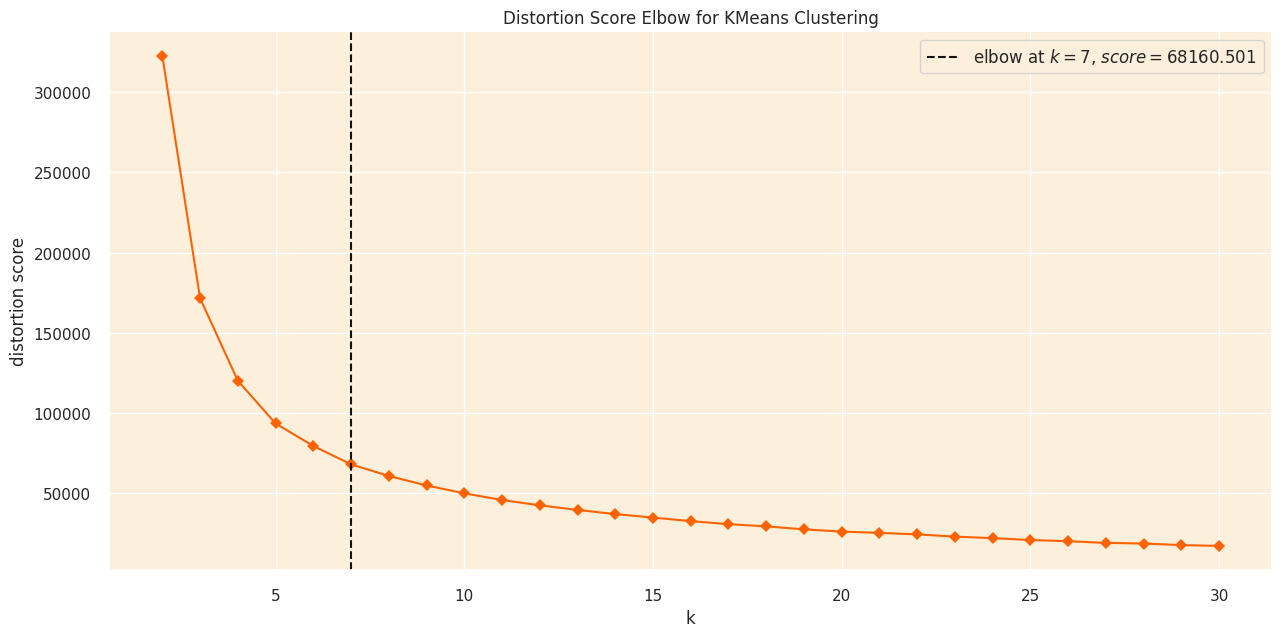

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [223]:
km = KMeans(random_state=0)
fig,ax = plt.subplots(figsize=(15,7))
visualizer = KElbowVisualizer(km,k=30,timings=False,ax=ax)
visualizer.fit(df[["IMDB_RATING","RT_CRITICS"]])
visualizer.show()

In [224]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(df[["IMDB_RATING","RT_CRITICS"]])

KMeans(n_clusters=7)

In [225]:
pd.DataFrame(kmeans.labels_).iloc[:,0].value_counts()

0
4    243
2    227
0    227
6    222
3    200
1    179
5    103
Name: count, dtype: int64

In [226]:
df_clustered = pd.concat([df["WON_OSCAR"],pd.DataFrame(kmeans.labels_,columns=["CLUSTER"])],axis=1)
df_clustered.head()

,WON_OSCAR,CLUSTER
0,False,6
1,False,3
2,False,4
3,False,4
4,False,1


In [227]:
for cluster in df_clustered["CLUSTER"].unique():
    print(f"Cluster {cluster}")
    display(df_clustered[df_clustered["CLUSTER"] == cluster]["WON_OSCAR"].value_counts())

Cluster 6


WON_OSCAR
False    215
True       7
Name: count, dtype: int64

Cluster 3


WON_OSCAR
False    138
True      62
Name: count, dtype: int64

Cluster 4


WON_OSCAR
False    235
True       8
Name: count, dtype: int64

Cluster 1


WON_OSCAR
False    178
True       1
Name: count, dtype: int64

Cluster 2


WON_OSCAR
False    222
True       5
Name: count, dtype: int64

Cluster 0


WON_OSCAR
False    217
True      10
Name: count, dtype: int64

Cluster 5


WON_OSCAR
False    103
Name: count, dtype: int64

## We can see way better results, as most of the oscar winners have been clustered on cluster 3

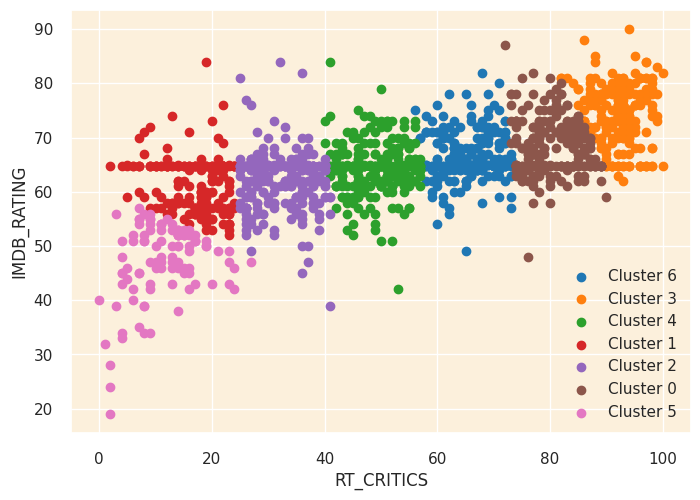

In [229]:
import math
from itertools import cycle
import matplotlib.cm as cm
colors = cycle(cm.tab10.colors)
labels  =  pd.DataFrame(kmeans.labels_,columns=["CLUSTER"])

for i in labels["CLUSTER"].unique():
    color = next(colors)
    idx = labels["CLUSTER"] == i
    plt.scatter(y=df[idx]["IMDB_RATING"],x=df[idx]["RT_CRITICS"],color=color,label=f"Cluster {i}")
# plt.scatter(y=df["IMDB_RATING"],x=df["RT_CRITICS"],c=df_scaled["CLUSTER"])
plt.xlabel("RT_CRITICS")
plt.ylabel("IMDB_RATING")
plt.legend()
plt.show()

## We can see that cluster 3 which has the most oscar winners is ont the high end of both axis, which is to be expected

## Now let's try a different clustering approach, to see if the results are better

In [239]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN().fit(df_scaled[["IMDB_RATING","RT_CRITICS"]])

In [240]:
labels = dbscan.labels_
labels = pd.DataFrame(labels,columns=["CLUSTER"])

In [241]:
labels.head()

,CLUSTER
0,0
1,0
2,0
3,0
4,0


In [242]:
labels.value_counts()

CLUSTER
0          1401
Name: count, dtype: int64

## Immediately the result are bad, let's test different parameters to see if results change

In [243]:
eps = np.linspace(0.01,1,num=15)
min_samples=np.arange(2,20,step=3)
import itertools
combinations = list(itertools.product(eps,min_samples))
combinations

[(0.01, 2),
 (0.01, 5),
 (0.01, 8),
 (0.01, 11),
 (0.01, 14),
 (0.01, 17),
 (0.08071428571428571, 2),
 (0.08071428571428571, 5),
 (0.08071428571428571, 8),
 (0.08071428571428571, 11),
 (0.08071428571428571, 14),
 (0.08071428571428571, 17),
 (0.15142857142857144, 2),
 (0.15142857142857144, 5),
 (0.15142857142857144, 8),
 (0.15142857142857144, 11),
 (0.15142857142857144, 14),
 (0.15142857142857144, 17),
 (0.22214285714285714, 2),
 (0.22214285714285714, 5),
 (0.22214285714285714, 8),
 (0.22214285714285714, 11),
 (0.22214285714285714, 14),
 (0.22214285714285714, 17),
 (0.29285714285714287, 2),
 (0.29285714285714287, 5),
 (0.29285714285714287, 8),
 (0.29285714285714287, 11),
 (0.29285714285714287, 14),
 (0.29285714285714287, 17),
 (0.3635714285714286, 2),
 (0.3635714285714286, 5),
 (0.3635714285714286, 8),
 (0.3635714285714286, 11),
 (0.3635714285714286, 14),
 (0.3635714285714286, 17),
 (0.4342857142857143, 2),
 (0.4342857142857143, 5),
 (0.4342857142857143, 8),
 (0.4342857142857143, 11),
 

In [245]:
from sklearn.metrics import silhouette_score as ss
# Grid searching for best params
def get_scores_and_labels(combinations,X):
    scores = []
    all_labels_list = []
    for i,(eps,num_samples) in enumerate(combinations):
        dbscan_model = DBSCAN(eps=eps,min_samples=num_samples).fit(X)
        labels = dbscan_model.labels_
        labels_set = set(labels)
        num_clusters = len(labels_set)
        if -1 in labels_set:
            num_clusters-=1
            
        if num_clusters < 2 :
            scores.append(-10)
            all_labels_list.append('bad')
            continue
        scores.append(ss(X,labels))
        all_labels_list.append(labels)
    
    best_idx = np.argmax(scores)
    best_params = combinations[best_idx]
    best_labels = all_labels_list[best_idx]
    best_score = scores[best_idx]
    return best_params[0],best_params[1],best_labels,best_score

best_eps,best_mins, best_labels,best_score = get_scores_and_labels(combinations,df_scaled[["IMDB_RATING","RT_CRITICS"]])

In [246]:
best_eps

0.08071428571428571

In [248]:
labels = best_labels
labels = pd.DataFrame(labels,columns=["CLUSTER"])
labels.value_counts()

CLUSTER
 0         1392
-1            5
 1            4
Name: count, dtype: int64

## Again the results , even after grid-searching for the best parameters aren't worth considering analyzing, as all the data is clustered into one cluster